<h1 style="font-size: 26px; color: white; background-color: #334580; padding: 10px; border-radius: 5px; text-align: center;">
    Customer Personality Analysis
</h1>

**People related columns;** 
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products related columns**

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores*
* NumWebVisitsMonth: Number of visits to company’s website in the last month

In [277]:
# Define column groups
people = [ "Year_Birth", 'Education_Category', 'Marital_Desc', "Income", "Family_Size", "Days_Since_Customer", "Recency", "Complain"]
products = [ "MntWines", "MntFruits", "MntMeatProducts",  "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
promotion = [ "NumDealsPurchases", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]
place = ["NumWebPurchases", "NumCatalogPurchases",  "NumStorePurchases", "NumWebVisitsMonth"]

**Clustering Models**
1. Baseline Model: **K-Means**
Start with K-Means as a baseline.
Use the Elbow Method or Silhouette Score to determine the optimal number of clusters.
Visualize clusters using PCA or t-SNE.

3. Advanced Clustering Models
**DBSCAN**: For datasets with noise and non-spherical clusters.
**Gaussian Mixture Models (GMM)**: Probabilistic approach to model clusters.
**Agglomerative Clustering:** Hierarchical clustering for more control over cluster merging.
**Self-Organizing Maps (SOMs)**: Neural network-based unsupervised learning for clustering high-dimensional data.


5. Deep Learning-Based Clustering
**Autoencoders + K-Means:** Use autoencoders to reduce dimensionality and cluster the latent space.
**t-SNE/UMAP + K-Means:** For better visualization and improved clustering performance.

<h1 style="font-size: 22px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
    1.Data Quality Control
</h1>

In [1]:
import pandas as pd
import numpy as np

In [459]:
data = pd.read_csv('Downloads/marketing_campaign.csv', sep ='\t')

In [275]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [24]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [28]:
(data
 .isna()
 .mean().mul(100).round(2)
 )

ID                     0.00
Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 1.07
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntWines               0.00
MntFruits              0.00
MntMeatProducts        0.00
MntFishProducts        0.00
MntSweetProducts       0.00
MntGoldProds           0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
Complain               0.00
Z_CostContact          0.00
Z_Revenue              0.00
Response               0.00
dtype: float64

Therre is only one missing columns, Income, percentage of missing raws to all data is % 1.07. I will drop na columns.

In [461]:
print ( "Before drop na values; ", data.shape[0])
data= data.dropna()
print ( "After dropping na values; ", data.shape[0])

Before drop na values;  2240
After dropping na values;  2216


Check duplicates

In [4]:
data.duplicated().sum()

0

Change to type of Dt_Customer column from object to date

In [463]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst= True)

ID, Z_CostContact, Z_CostContact, Z_Revenue these columns has no explanation and descriptions. We dont know what they are. Drop it.

In [465]:
data.drop(columns= ["ID", "Z_CostContact", "Z_CostContact", "Z_Revenue"],inplace=True )

In [288]:
object_columns = (data
 .select_dtypes(object)
 .columns
 .tolist()
)
object_columns

['Education', 'Marital_Status']


<h2 style="font-size: 22px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
    1.1. People Related Columns Clustering
</h2>

In [290]:
for x in object_columns:
  print(f"Value counts for column '{x}':")
  print(data[x].value_counts())
  print("-" * 50)

Value counts for column 'Education':
Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
--------------------------------------------------
Value counts for column 'Marital_Status':
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
--------------------------------------------------


<Axes: xlabel='Education', ylabel='Count'>

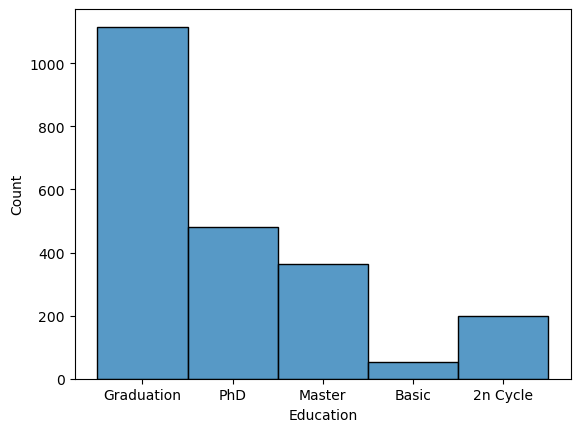

In [180]:
sns.histplot( data= data["Education"])

PhD + Master Education 
Graduation  
Basic + 2n Cycle

In [467]:
education_mapping = {
    "PhD": "PhD + Master",
    "Master": "PhD + Master",
    "Graduation": "Graduation",
    "2n Cycle": "Basic + 2n Cycle",
    "Basic": "Basic + 2n Cycle"
}

data['Education_Category'] = data['Education'].replace(education_mapping)

In [469]:
data.drop ( columns= "Education" , inplace=True)

print(data['Education_Category'].value_counts())

Education_Category
Graduation          1116
PhD + Master         846
Basic + 2n Cycle     254
Name: count, dtype: int64


<Axes: xlabel='Education_Category', ylabel='Count'>

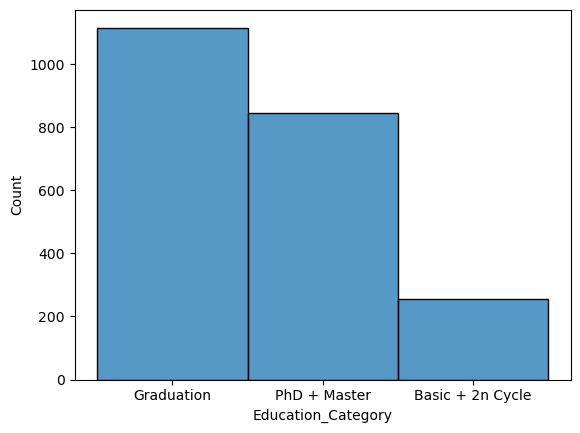

In [314]:
sns.histplot(data=data["Education_Category"])

<Axes: xlabel='Marital_Status', ylabel='Count'>

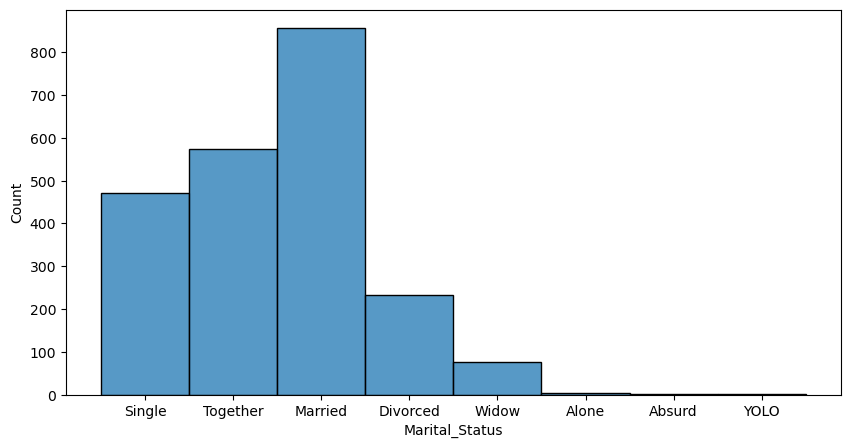

In [296]:
plt.figure(figsize=(10, 5))
sns.histplot( data= data["Marital_Status"])

Single = Single + Alone + Absurd + YOLO + Divorced + Widow

Together = Together +  Married

In [471]:
 Marital_map ={"Single": "Single",
           "Alone":"Single",
           "Absurd": "Single",
           "YOLO": "Single",
           "Divorced": "Single",
           "Widow": "Single",
           "Together" : "Together",
           "Married": "Together"
          }

data["Marital_Desc"] = data["Marital_Status"].replace(Marital_map)

In [473]:
data.drop(columns = "Marital_Status", inplace= True)

<Axes: xlabel='Marital_Desc', ylabel='Count'>

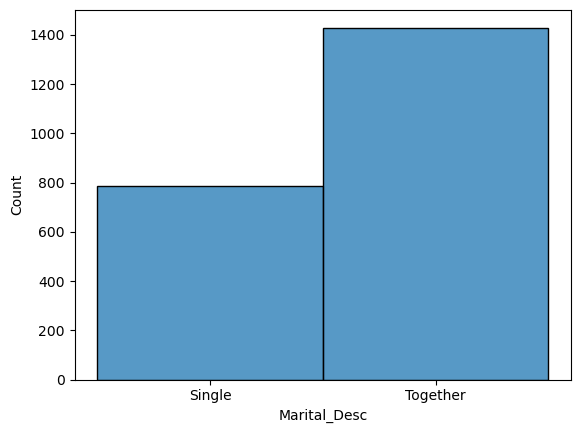

In [316]:
sns.histplot( data.Marital_Desc)

In [475]:
max_date = pd.to_datetime(data["Dt_Customer"].max())
data[data["Dt_Customer"] == max_date][["Recency", "Dt_Customer"]].reset_index()

,index,Recency,Dt_Customer
0,200,50,2014-06-29
1,989,1,2014-06-29


In [477]:
last_date_system= max_date + pd.to_timedelta(data.loc[data["Dt_Customer"] == max_date, "Recency"].max(), unit='D')
last_date_system
data['Days_Since_Customer'] = (last_date_system - data['Dt_Customer']).dt.days
data['Is_Parent'] =data.apply(lambda row: 1 if(row["Kidhome"]+ row["Teenhome"]) > 0 else 0, axis=1)
data["Age"] = last_date_system.year - data["Year_Birth"]

In [479]:
data.drop(columns= ['Dt_Customer','Kidhome','Teenhome', "Year_Birth"],inplace= True)

In [481]:
people = [ "Age", 'Education_Category', 'Marital_Desc', "Income", "Is_Parent", "Days_Since_Customer", "Recency", "Complain"]

Checking Outliers in People related columns;

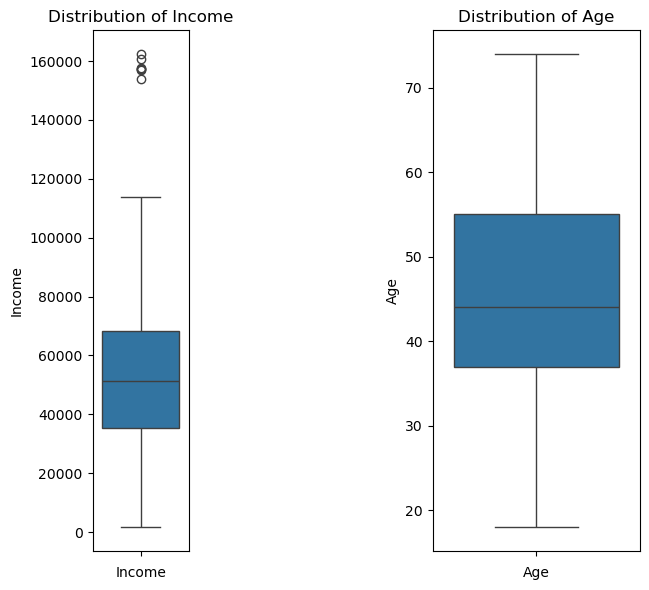

In [437]:
col = ["Income", "Age"]
plt.figure(figsize = (10,6))

for i,col in enumerate(col):
    plt.subplot(1, len(col), i+1)
    sns.boxplot(data= data[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [483]:
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
print(f"Upper limit for outliers: {upper_limit}")


Upper limit for outliers: 118350.5


In [485]:
#data[people].groupby("Income").size().sort_index(ascending=False).head(20)
data['Income'] = data['Income'].apply(lambda x: min(x, 118263))

In [487]:
median_age = data[data['Age'] < 76]["Age"].median()
data['Age'] = data['Age'].apply(lambda x: median_age if x > 75 else x)

#median_income= data[data["Income"] < 170000]["Income"].median()
#data["Income"] = data["Income"].apply(lambda x: median_income if x > 170000 else x)

In [489]:
data[people][["Education_Category","Marital_Desc"]].value_counts()

Education_Category  Marital_Desc
Graduation          Together        714
PhD + Master        Together        546
Graduation          Single          402
PhD + Master        Single          300
Basic + 2n Cycle    Together        170
                    Single           84
Name: count, dtype: int64

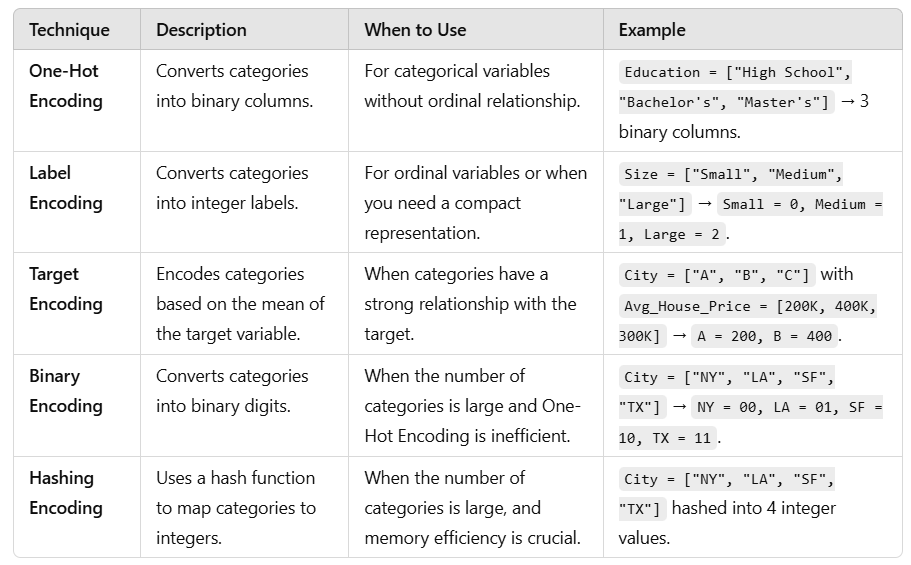

In [491]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder( max_categories = 10, #max category number is 3 in our dataset right now
  sparse_output = False, #returns a dense matrix, Numpy array, smaller datasets, dense matrices might be easier to work with
  handle_unknown = "error", #default, other options is "ignore"
  drop = None #this is kmeans so it should remain none, but for linear regression it should be "first" To avoid multicollinearity issues
)
encoded_data_person = encoder.fit_transform(data[["Education_Category","Marital_Desc"]])
encoded_data_person= pd.DataFrame(encoded_data_person,
             columns=encoder.get_feature_names_out(["Education_Category","Marital_Desc"]),
             index=data.index)

In [493]:
data_encoded = pd.concat([data[people].drop(columns=["Education_Category","Marital_Desc"]), encoded_data_person], axis=1)

In [495]:
columns_ = data_encoded.columns.tolist()

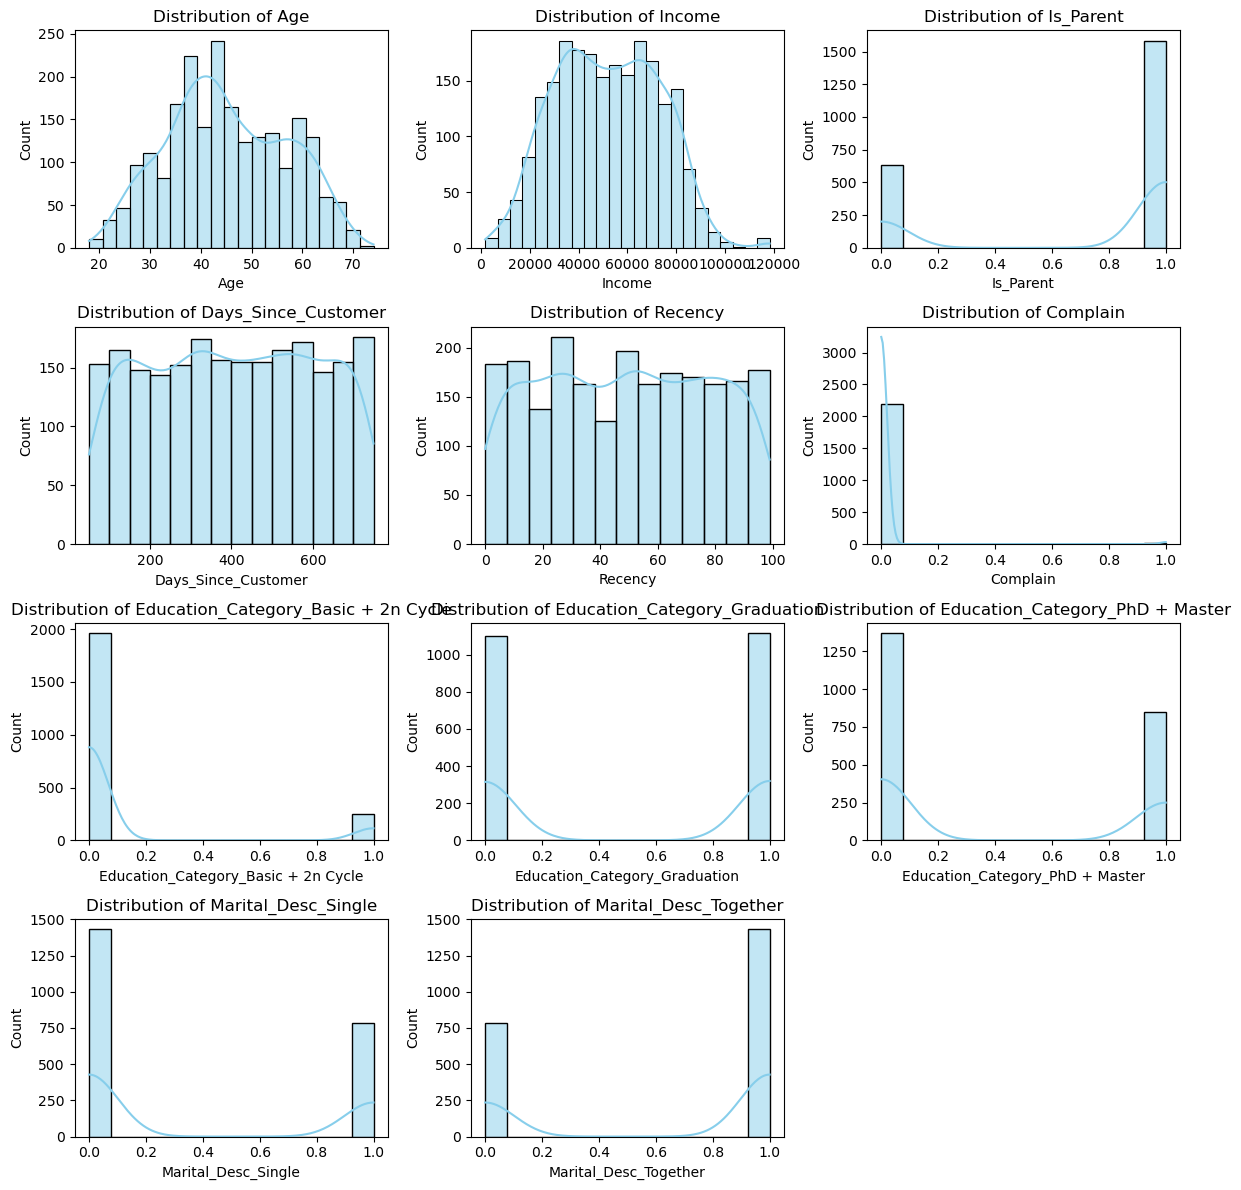

In [497]:
import math
num_cols = len(columns_)
num_rows = math.ceil(num_cols / 3)  #3 subplots per row

plt.figure(figsize=(12, num_rows * 3))  # Adjust height dynamically
for i, col in enumerate(data_encoded.columns):
    plt.subplot(num_rows, 3, i + 1)  # Dynamically calculate rows and columns
    sns.histplot(data_encoded[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(f"{col}")
plt.tight_layout()
plt.show()


**Scale Data**

In [513]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)
data_scaled = pd.DataFrame(data_scaled, columns=data_encoded.columns)

**Choosing k value**

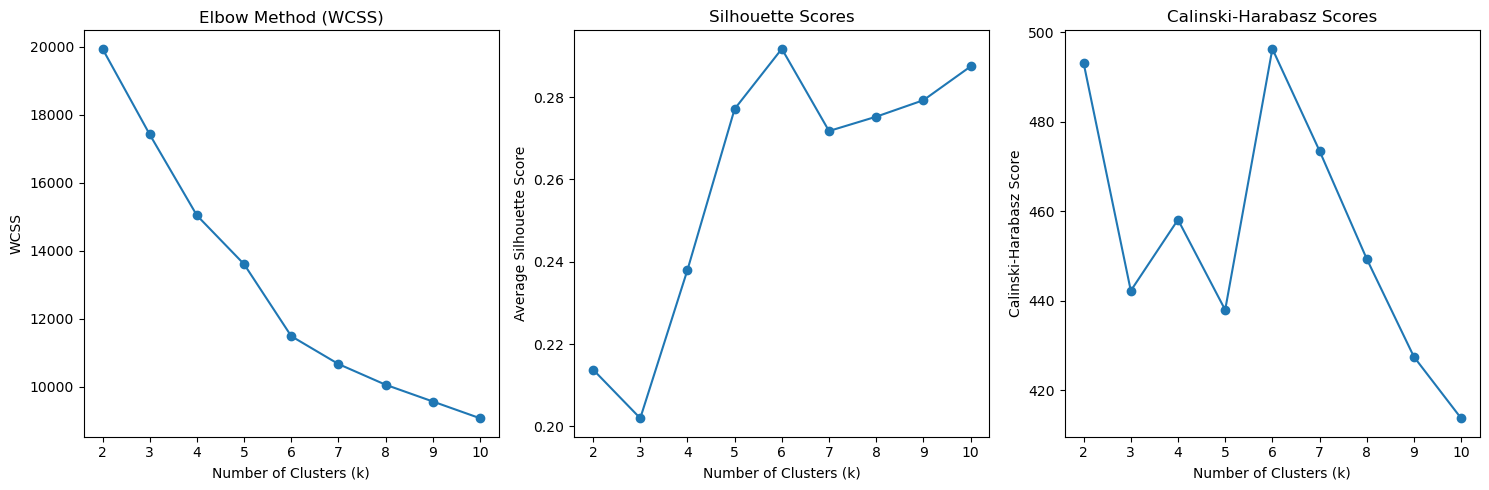

In [517]:
k_values = range(2, 11)

wcss = []
silhouette_scores = []
calinski_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    labels = kmeans.labels_
    
    # WCSS (Inertia)
    wcss.append(kmeans.inertia_)
    
    # Silhouette Score
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    
    # Calinski-Harabasz Score
    calinski_scores.append(calinski_harabasz_score(data_scaled, labels))


plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.plot(k_values, wcss, marker='o')
plt.title("Elbow Method (WCSS)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")


plt.subplot(1, 3, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Score")

plt.subplot(1, 3, 3)
plt.plot(k_values, calinski_scores, marker='o')
plt.title("Calinski-Harabasz Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Calinski-Harabasz Score")

plt.tight_layout()
plt.show()

Based on these graphs, i decided to select k as 6

In [678]:
km= KMeans(n_clusters = 4 , n_init= 25, random_state = 1234)
km.fit(data_scaled)

KMeans(n_clusters=4, n_init=25, random_state=1234)

* Key parameters for small datasets: n_clusters, init, random_state, n_init.
* Key parameters for large datasets: batch_size, init_size, algorithm.

In [683]:
data["Cluster_People"] = km.labels_.tolist()

* Centroid Values: Interpret the centroid values to understand the typical characteristics of each cluster.
* Cluster Assignments: Assign each data point to a cluster and observe the groupings.
* Cluster Size: Check the number of data points in each cluster.

In [686]:
km.cluster_centers_

array([[ 0.04666949,  0.05448612, -0.08979169,  0.0036115 ,  0.01108078,
        -0.0095941 , -0.35980513,  0.13808253,  0.09382372,  1.34882854,
        -1.34882854],
       [-0.05175804,  0.00392677,  0.04326404,  0.03585225,  0.0053221 ,
         0.04674678, -0.35980513,  0.99280566, -0.78582329, -0.74138408,
         0.74138408],
       [-0.41446735, -0.47737502, -0.06488664,  0.10013486, -0.01784865,
         0.06473126,  2.77928218, -1.00724647, -0.78582329, -0.05013266,
         0.05013266],
       [ 0.20049078,  0.14688697,  0.08905577, -0.09810995, -0.01290317,
        -0.07890821, -0.35980513, -1.00724647,  1.27255072, -0.74138408,
         0.74138408]])

In [688]:
columns_to_analyze = ['Income', 'Recency']
centroids_df = pd.DataFrame(km.cluster_centers_, columns=data_encoded.columns)
centroids_subset = centroids_df[columns_to_analyze]
print(centroids_subset)

     Income   Recency
0  0.054486  0.011081
1  0.003927  0.005322
2 -0.477375 -0.017849
3  0.146887 -0.012903


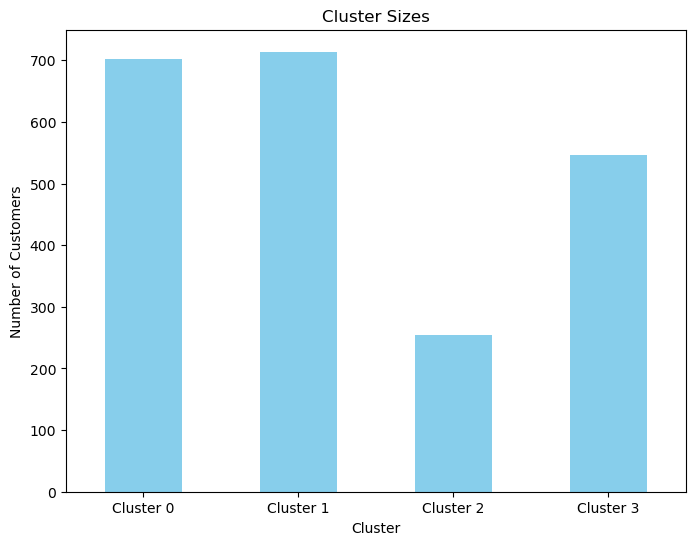

In [698]:
# Cluster Distribution
cluster_counts = pd.Series(km.labels_).value_counts().sort_index()
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(range(len(cluster_counts)), labels=[f'Cluster {i}' for i in cluster_counts.index], rotation=0)
plt.show()


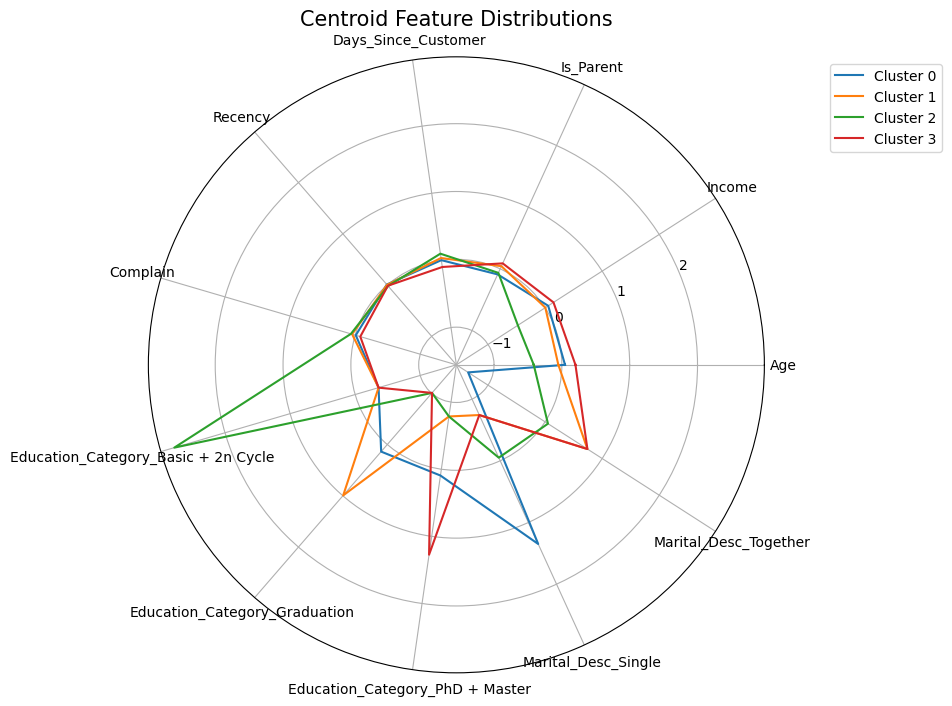

In [700]:
from math import pi

# Prepare Data for Radar Chart
centroids_normalized = centroids_df.copy()
centroids_normalized.index = [f'Cluster {i}' for i in centroids_normalized.index]
categories = centroids_normalized.columns

# Radar Plot for Each Cluster
plt.figure(figsize=(10, 8))
for i in range(len(centroids_normalized)):
    values = centroids_normalized.iloc[i].tolist()
    values += values[:1]  # Close the circle
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]
    plt.polar(angles, values, label=f'Cluster {i}')

# Add Labels
plt.xticks(angles[:-1], categories, color='black', size=10)
plt.title('Centroid Feature Distributions', size=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


It seems like **Recency**, **Days_Since_Customer** and **Complain** not significantly contribute to differentiation between clusters

**Cluster 0**; individuals who are likely graduates and single. Likely represents single individuals with moderate education levels.

**Cluster 1**; indivuduals who are likely graduates and together. Represents  individuals in relationships with graduate-level education and moderate-to-high income.

**Cluster 2**  Likely represents individuals with lower education levels and lower income, who are possibly in relationships.

**Cluster 3** Highly educated individuals with high income. Could represent affluent professionals or academics.

**Cluster 3 (Red)**: Target high-end products or services, as this cluster has the highest education and income.

**Cluster 1 (Orange)**: Focus on families or couples, offering mid-range products suited to graduates with stable incomes.

**Cluster 2 (Green)**: Cater to budget-conscious individuals with basic education. Offers related to discounts or affordable products may appeal.

**Cluster 0 (Blue)**: Develop products for younger, single individuals with moderate education, such as career-starting or personal lifestyle products.

**Closer to the Center**
* A feature value close to 0 (in normalized data) indicates that the cluster's centroid has a value near the overall mean of that feature in the dataset.
* If all points for a feature in a cluster are near the center, the cluster doesn't strongly differentiate in that feature.

**Farther from the Center:**
* Indicates a feature value that is significantly above or below the mean, depending on the direction.
* If a cluster stretches far outward along an axis, it means that cluster is distinct in that feature.

**RESULTS OF FIRST PERSON CLUSTERING**

In [762]:
wcss = kmeans.inertia_
silhouette = silhouette_score(data_scaled, kmeans.labels_)
calinski = calinski_harabasz_score(data_scaled, kmeans.labels_)

print(f"WCSS (Within-Cluster Sum of Squares) for 4 clusters: {wcss}")
print(f"Silhouette Score for 4 clusters: {silhouette}")
print(f"Calinski-Harabasz Score for 4 clusters: {calinski}")

WCSS (Within-Cluster Sum of Squares) for 4 clusters: 9067.904304946489
Silhouette Score for 4 clusters: 0.289823282533105
Calinski-Harabasz Score for 4 clusters: 492.46586403581625


**SECOND CLUSTERING**

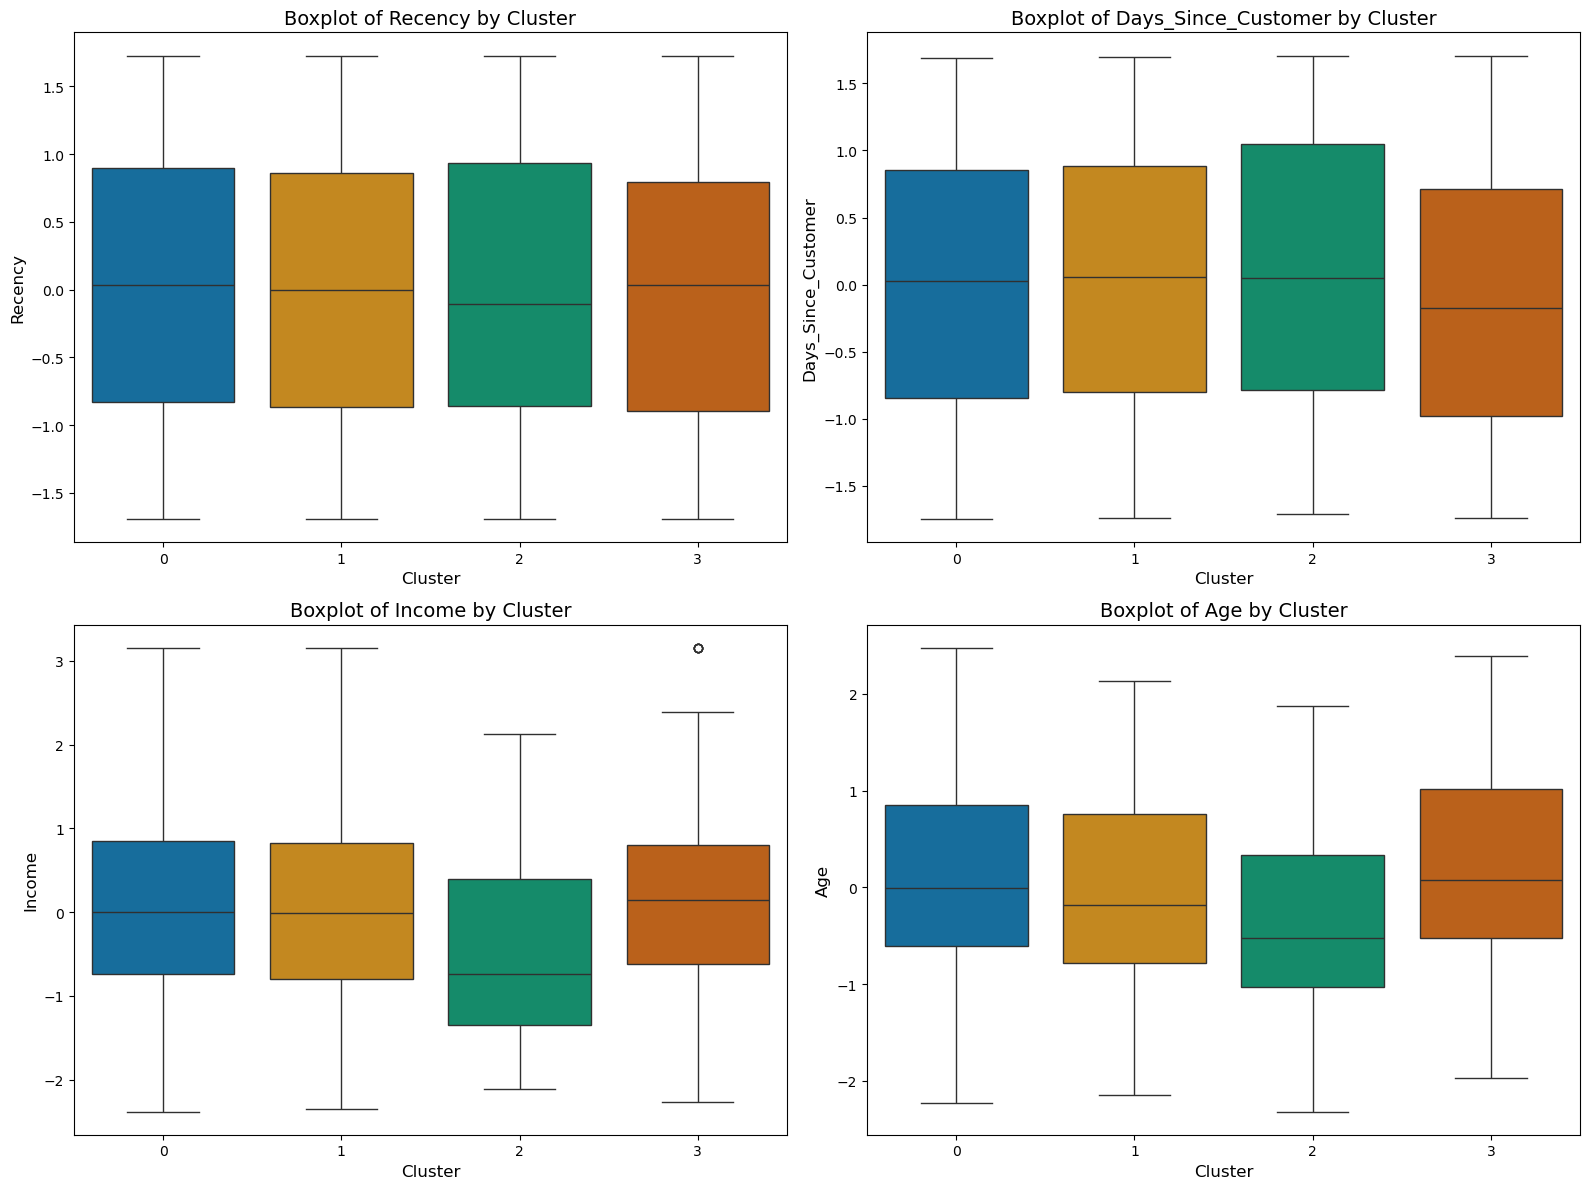

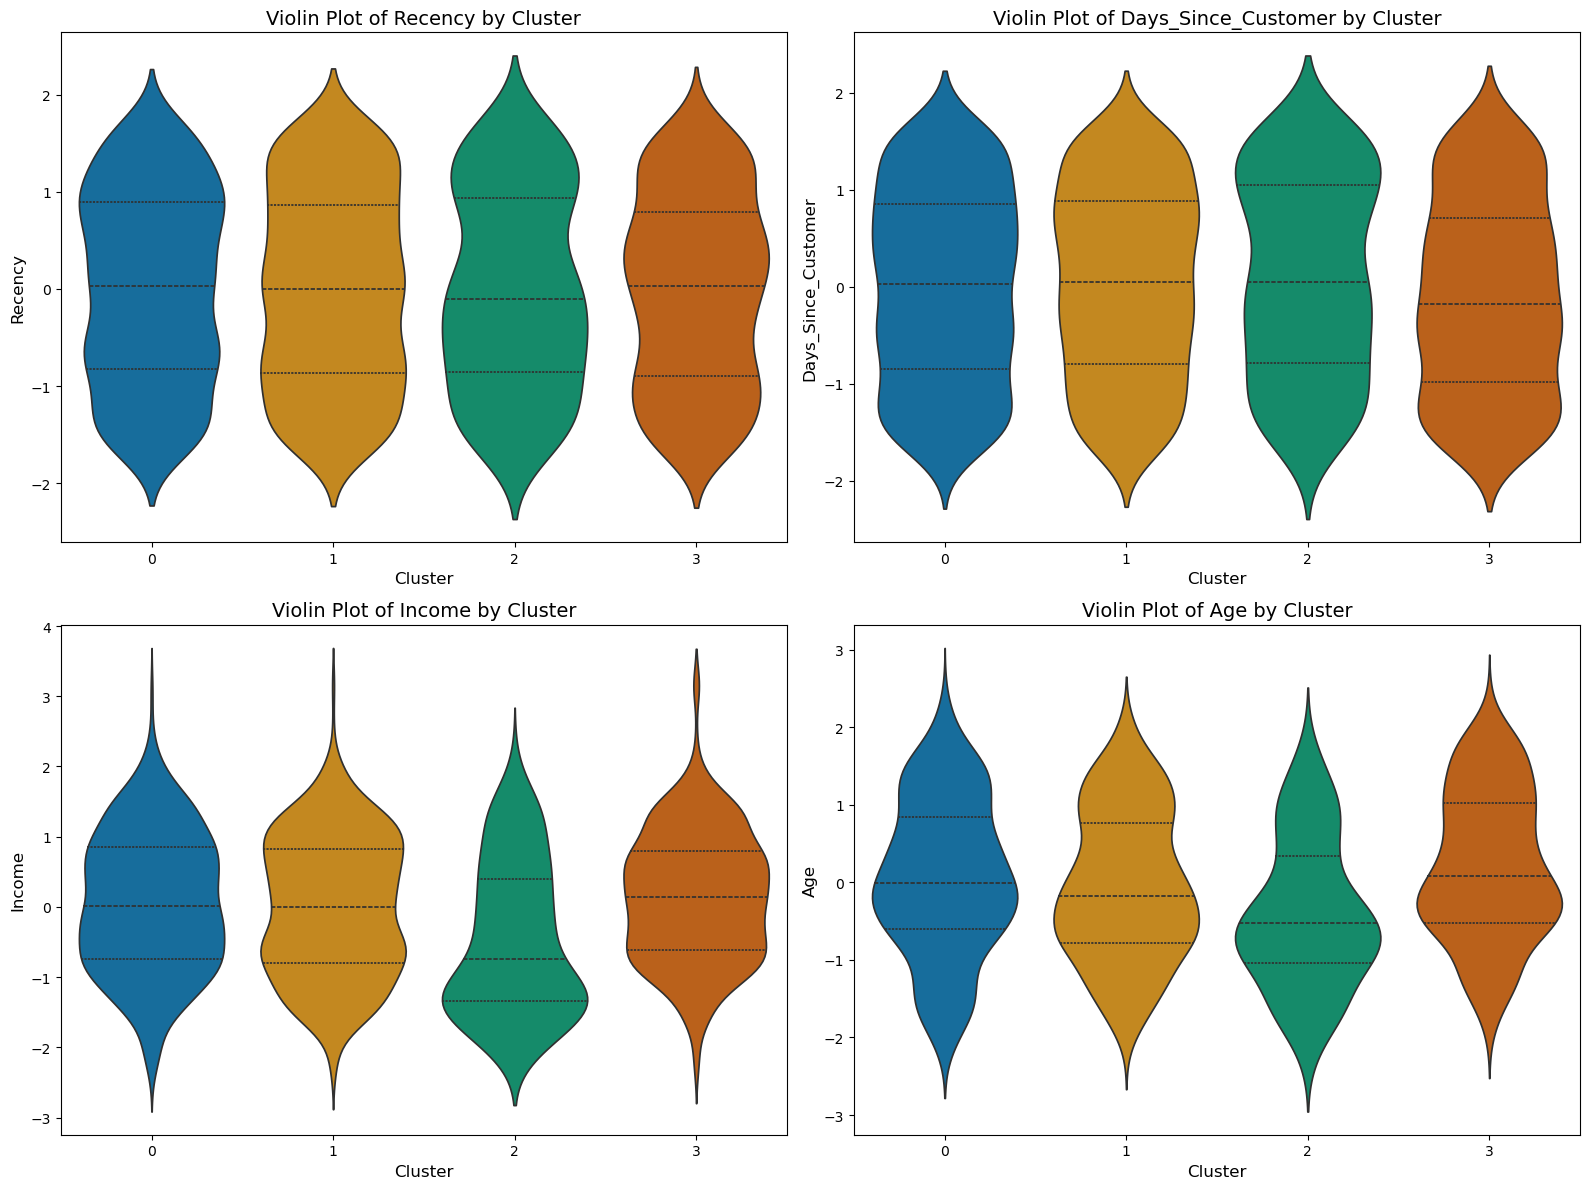

In [719]:
data_scaled['Cluster'] = km.labels_
features_to_analyze = ['Recency', 'Days_Since_Customer', 'Income', 'Age']

plt.figure(figsize=(16, 12))

for i, feature in enumerate(features_to_analyze):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid of subplots
    sns.boxplot(data=data_scaled, x='Cluster', y=feature, palette='colorblind', hue='Cluster', dodge=False, legend=False)
    plt.title(f'Boxplot of {feature} by Cluster', fontsize=14)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()


plt.figure(figsize=(16, 12))
for i, feature in enumerate(features_to_analyze):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(data=data_scaled, x='Cluster', y=feature, palette='colorblind', hue='Cluster', dodge=False, legend=False, inner='quartile')
    plt.title(f'Violin Plot of {feature} by Cluster', fontsize=14)
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

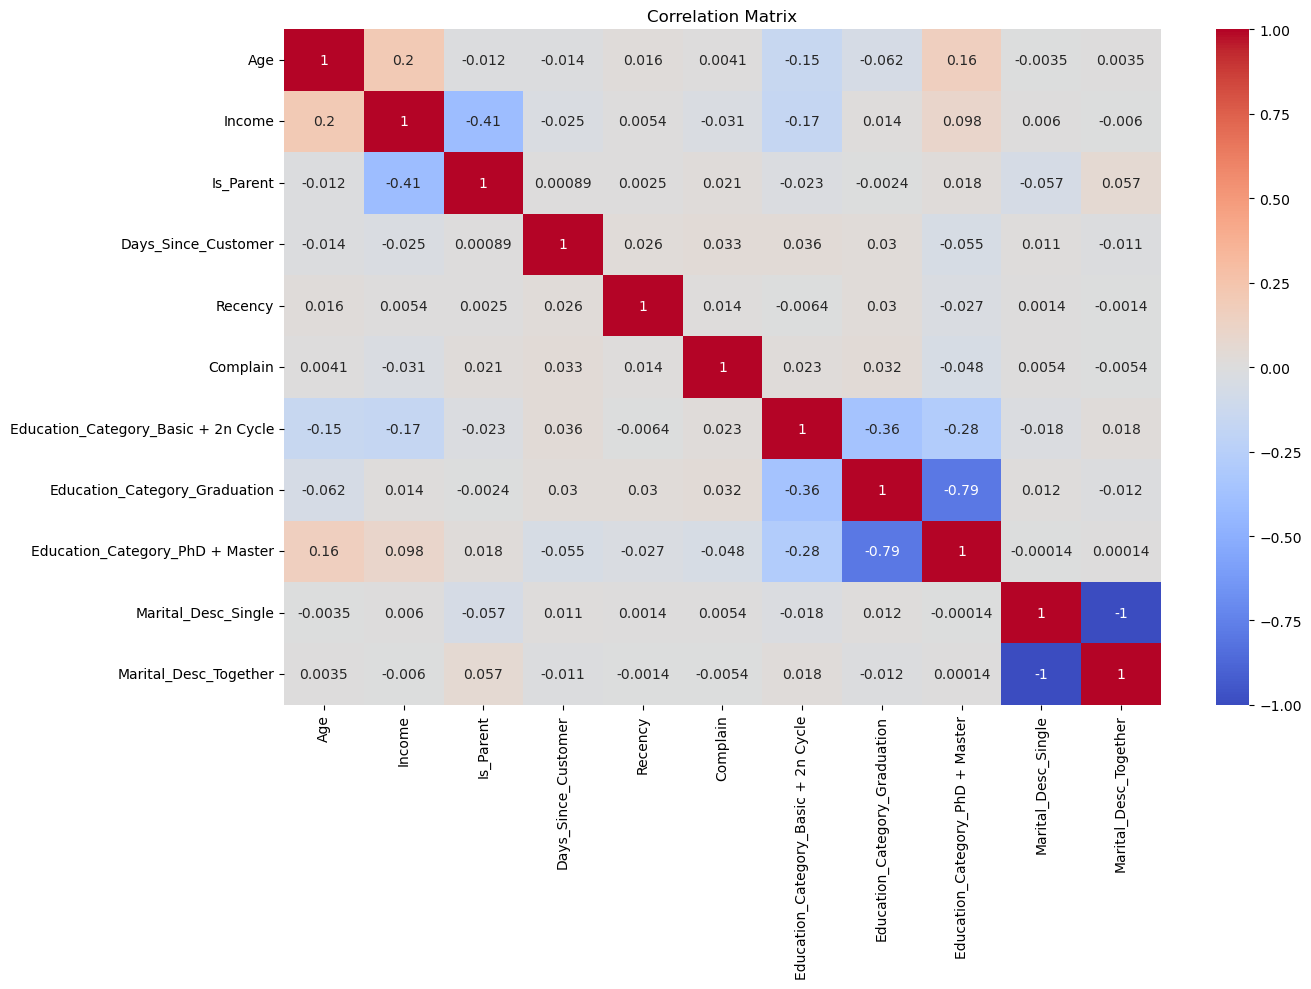

In [757]:
plt.figure(figsize=(14, 10))
corr_matrix = data_scaled.iloc[: , :-1].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [907]:

data['Age_Binned'] = pd.cut(data['Age'], bins=[0, 37, 55, np.inf], labels=["Young", "Middle-Aged", "Senior"])


data['Days_Since_Customer_Binned'] = pd.cut( data['Days_Since_Customer'], bins=[0, 230, 579, np.inf], labels=["Recent", "Moderate", "Long-term"])


data['Recency_Binned'] = pd.cut( data['Recency'], bins=[-1, 24, 74, np.inf], labels=["Very Recent", "Recent", "Long Time Ago"])


data['Income_Binned'] = pd.cut( data['Income'], bins=[0, 35303, 68522, np.inf], labels=["Low", "Medium", "High"])

education_mapping = {
    "PhD + Master": "High",
    "Graduation": "High",
    "Basic + 2n Cycle": "Basic"
}

data['Education_Category_2'] = data['Education_Category'].replace(education_mapping)

In [851]:
data[col_person].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age_Binned            2216 non-null   category
 1   Income_Binned         2216 non-null   category
 2   Is_Parent             2216 non-null   int64   
 3   Complain              2216 non-null   int64   
 4   Marital_Desc          2216 non-null   object  
 5   Education_Category_2  2216 non-null   object  
dtypes: category(2), int64(2), object(2)
memory usage: 91.1+ KB


In [923]:
col_person=["Age_Binned",
            #"Days_Since_Customer_Binned",
           # "Recency_Binned",
            "Income_Binned",
           # "Marital_Desc",
            "Education_Category"]

In [925]:
one_hot_col= (data[col_person].select_dtypes(include=['object', 'category'])
 .columns
 .tolist())

In [927]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder( max_categories = 10, #max category number is 3 in our dataset right now
  sparse_output = False, #returns a dense matrix, Numpy array, smaller datasets, dense matrices might be easier to work with
  handle_unknown = "error", #default, other options is "ignore"
  drop = None #this is kmeans so it should remain none, but for linear regression it should be "first" To avoid multicollinearity issues
)
encoded_data_person_2 = encoder.fit_transform(data[one_hot_col])
encoded_data_person_2= pd.DataFrame(encoded_data_person_2,
             columns=encoder.get_feature_names_out(one_hot_col),
             index=data.index)


data_encoded_2 = pd.concat([data[col_person].drop(columns=one_hot_col), encoded_data_person_2], axis=1)
data_encoded_2.isna().sum()

Age_Binned_Middle-Aged                 0
Age_Binned_Senior                      0
Age_Binned_Young                       0
Income_Binned_High                     0
Income_Binned_Low                      0
Income_Binned_Medium                   0
Education_Category_Basic + 2n Cycle    0
Education_Category_Graduation          0
Education_Category_PhD + Master        0
dtype: int64

In [915]:
#data_encoded_2.drop(columns= "Marital_Desc_Together", inplace=True)

In [929]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled_2 = scaler.fit_transform(data_encoded_2)
data_scaled_2 = pd.DataFrame(data_scaled_2, columns=data_encoded_2.columns)

In [931]:
km_= KMeans(n_clusters = 4 , n_init= 25, random_state = 1234)
km_.fit(data_scaled_2)
data["Cluster_People_2"] = km_.labels_.tolist()

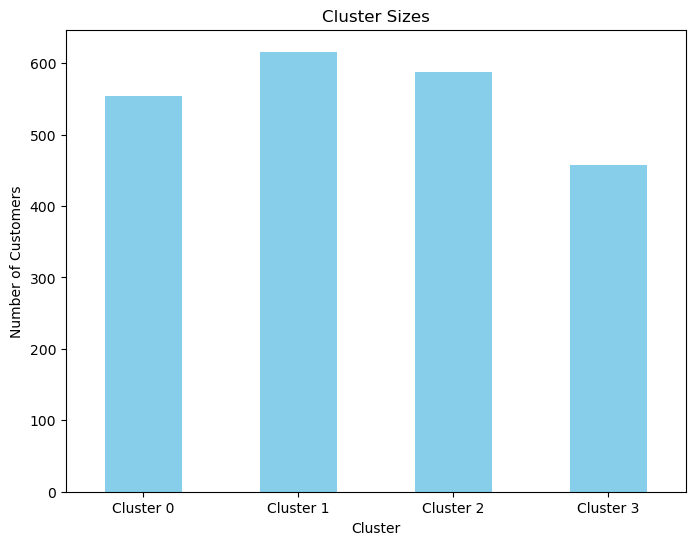

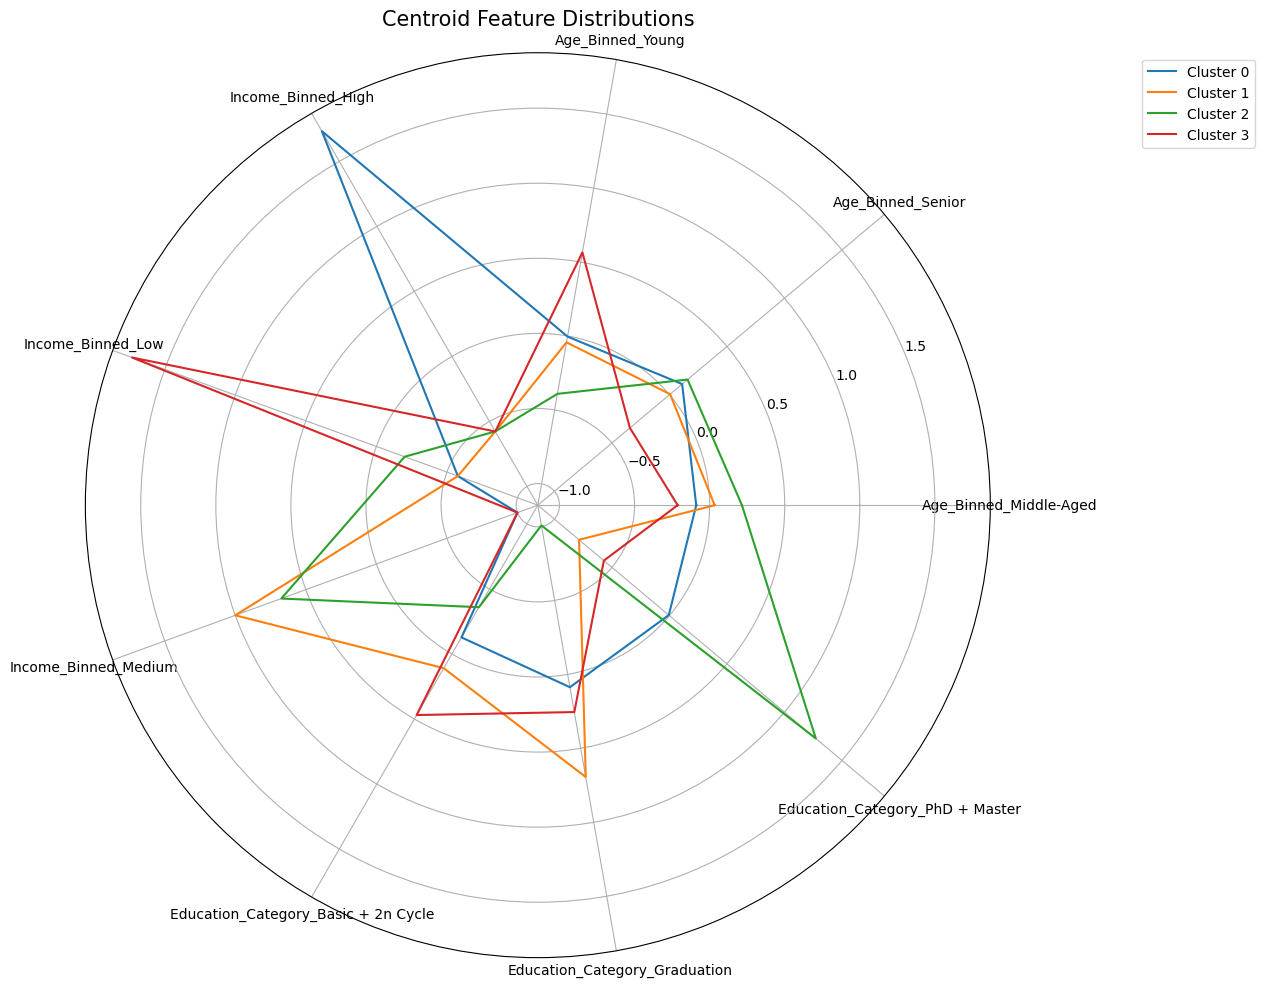

WCSS (Within-Cluster Sum of Squares) for 4 clusters: 11077.702302743775
Silhouette Score for 4 clusters: -0.027757013350564148
Calinski-Harabasz Score for 4 clusters: 155.055638502217


In [933]:
#columns_to_analyze = ['Income', 'Recency']
centroids_df = pd.DataFrame(km_.cluster_centers_, columns=data_encoded_2.columns)
#centroids_subset = centroids_df[columns_to_analyze]
#print(centroids_subset)

# Cluster Distribution
cluster_counts = pd.Series(km_.labels_).value_counts().sort_index()
plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(range(len(cluster_counts)), labels=[f'Cluster {i}' for i in cluster_counts.index], rotation=0)
plt.show()


from math import pi

# Prepare Data for Radar Chart
centroids_normalized = centroids_df.copy()
centroids_normalized.index = [f'Cluster {i}' for i in centroids_normalized.index]
categories = centroids_normalized.columns

# Radar Plot for Each Cluster
plt.figure(figsize=(14, 10))
for i in range(len(centroids_normalized)):
    values = centroids_normalized.iloc[i].tolist()
    values += values[:1]  # Close the circle
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]
    plt.polar(angles, values, label=f'Cluster {i}')

# Add Labels
plt.xticks(angles[:-1], categories, color='black', size=10)
plt.title('Centroid Feature Distributions', size=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()

wcss = km_.inertia_
silhouette = silhouette_score(data_scaled_2, kmeans.labels_)
calinski = calinski_harabasz_score(data_scaled_2, kmeans.labels_)

print(f"WCSS (Within-Cluster Sum of Squares) for 4 clusters: {wcss}")
print(f"Silhouette Score for 4 clusters: {silhouette}")
print(f"Calinski-Harabasz Score for 4 clusters: {calinski}")

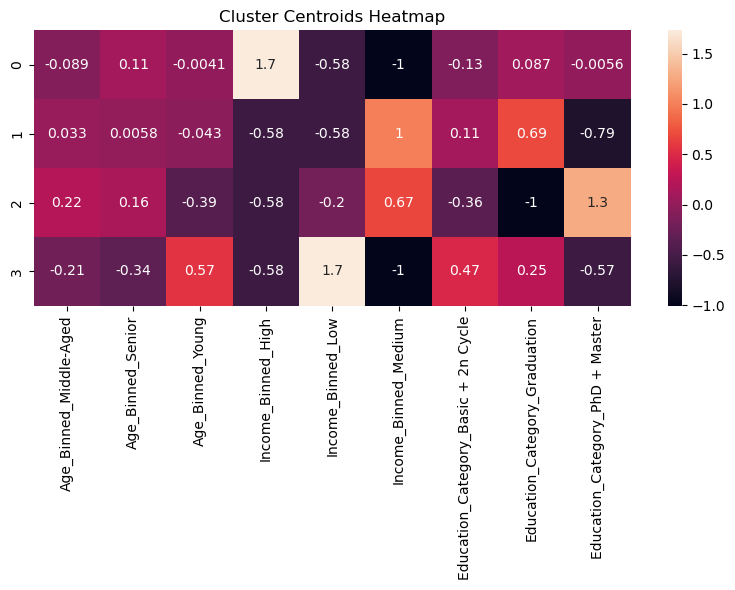

In [937]:
plt.figure(figsize=(8, 6))
sns.heatmap(centroids_df, annot=True, xticklabels=data_encoded_2.columns)
plt.title('Cluster Centroids Heatmap')
plt.tight_layout()
plt.show()


<h2 style="font-size: 22px; color: black; background-color: #b4c4df; padding: 10px; border-radius: 5px; text-align: left;">
    1.3. Promotion Related Columns Clustering
</h2>

In [ ]:
data['Total_Spending_Mnt'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [ ]:
data.drop(columns= ['AcceptedCmp1', "AcceptedCmp2", 'AcceptedCmp3', "AcceptedCmp4", "AcceptedCmp5", 'Response'], inplace=True)

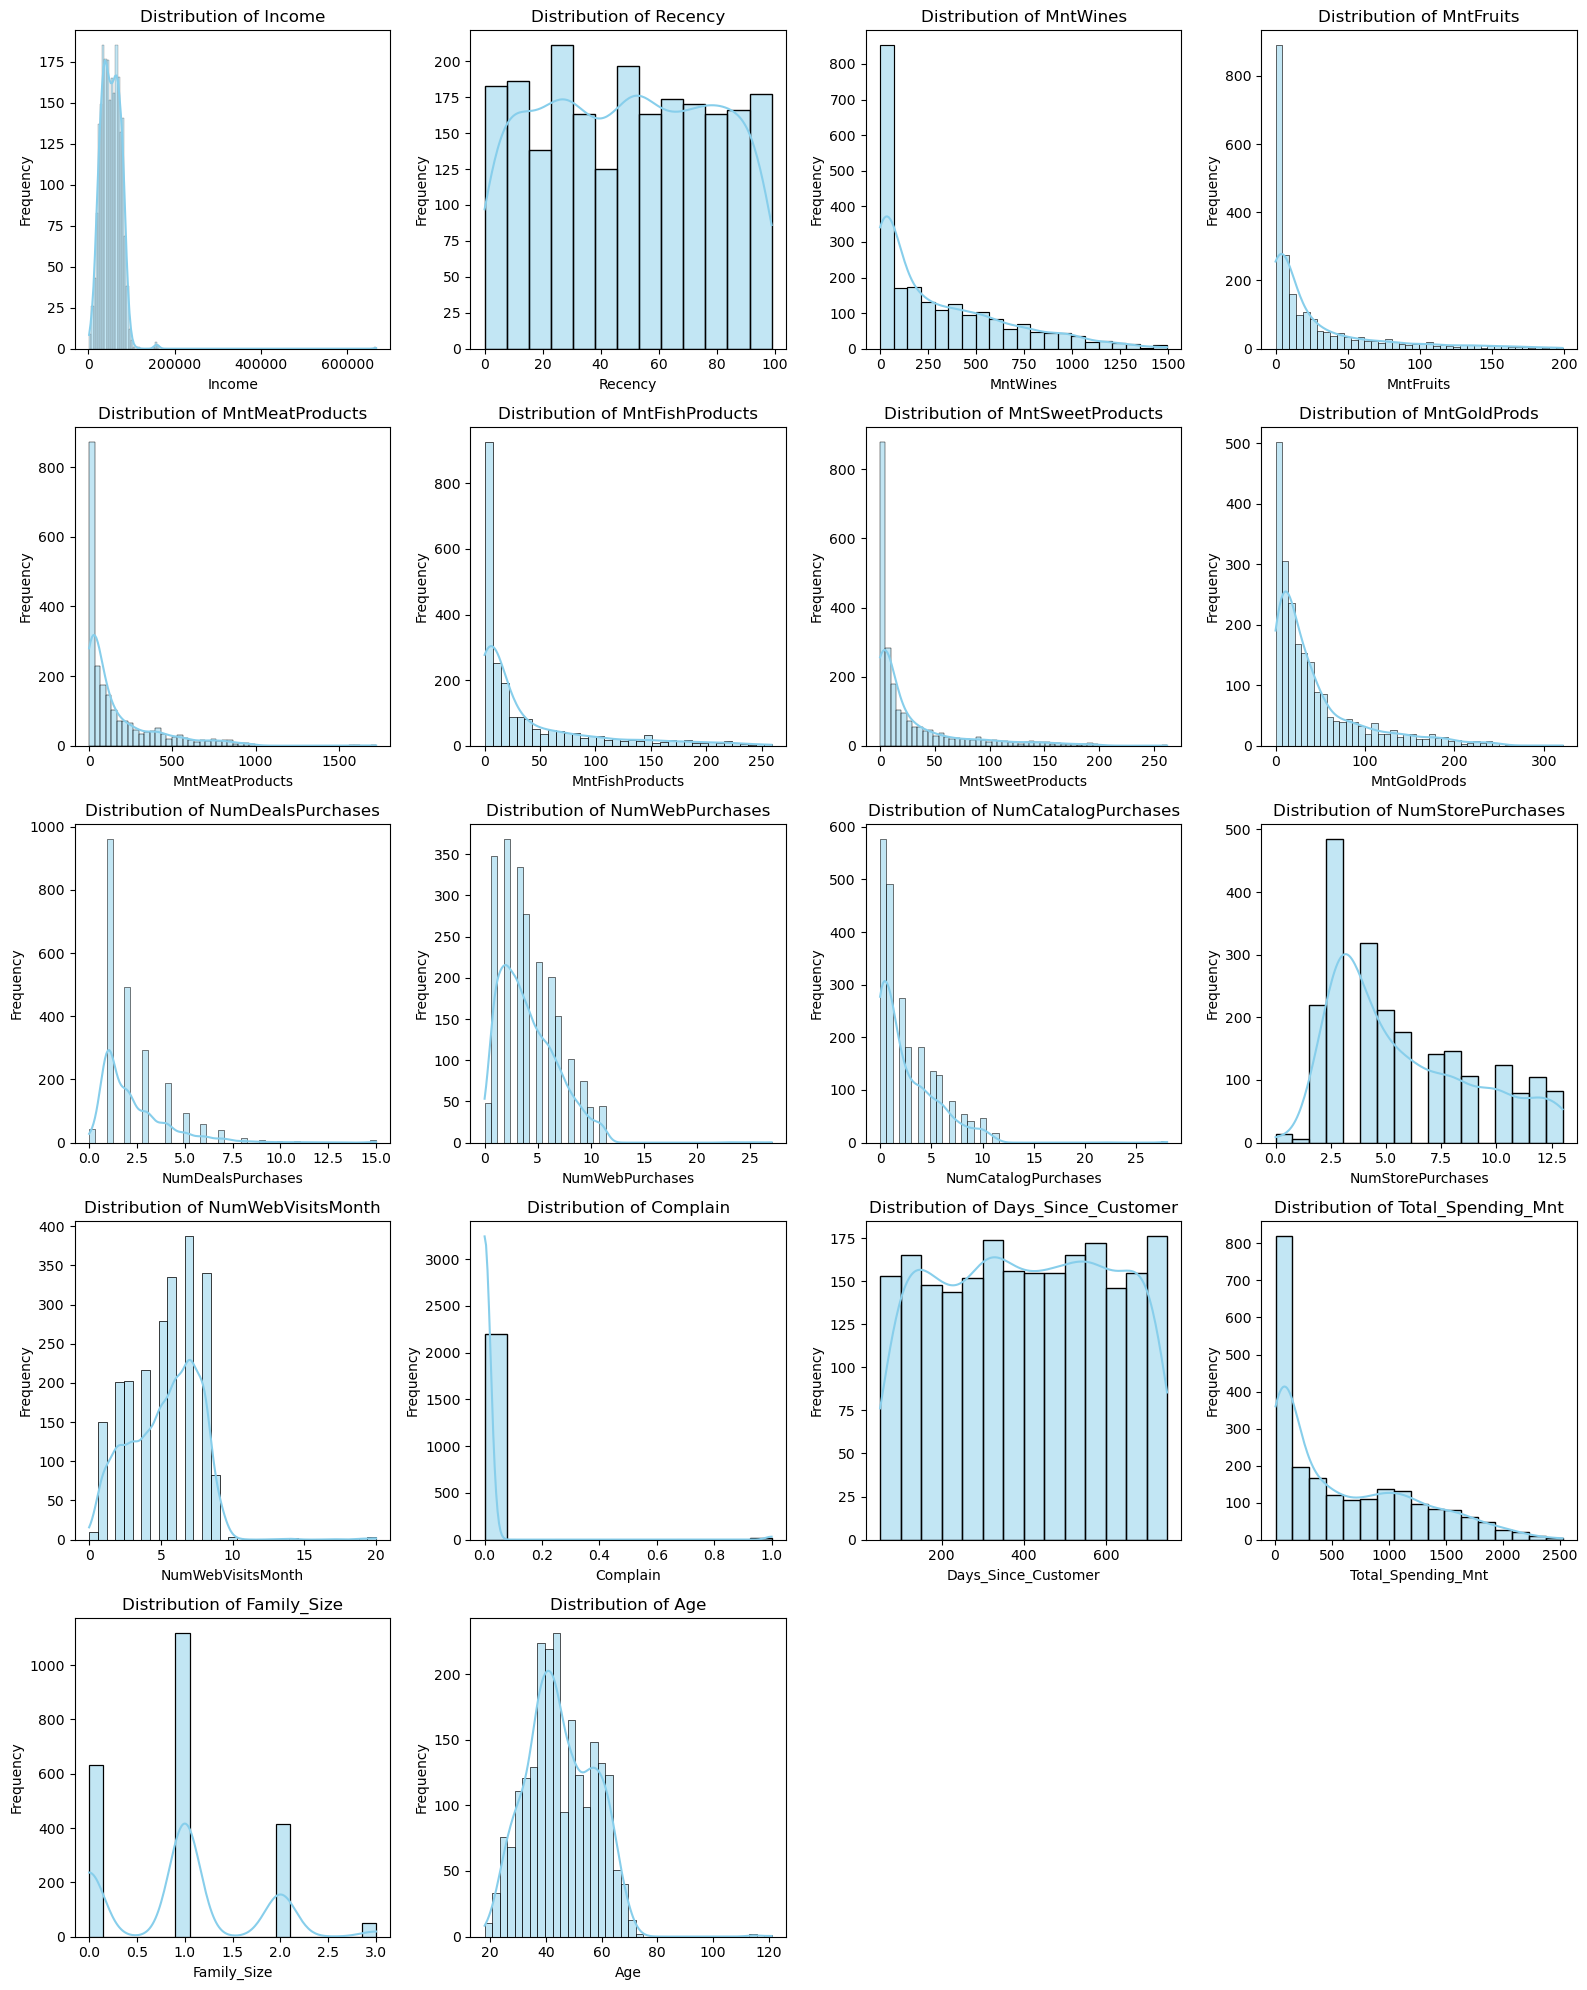

In [23]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

import math

n_cols = 4
n_rows = math.ceil(len(numerical_columns) / n_cols)

plt.figure(figsize=(n_cols * 4, n_rows * 4))  
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


**Income**: Highly right-skewed distribution. Apply a log transformation to reduce skewness.Handle outliers.

**Recency**:  Nearly uniform distribution; no significant skewness or extreme outliers.

**MntWines , MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, Total_Spending_Mnt**  Right-skewed with a long tail. Apply a log transformation to normalize the data.

**NumofDealPurchas** Right-skewed with a few peaks at lower values

Apply binning to age, family_site, day_since_customers and recency

**Handling Outliers**

In [89]:
data[["Income", "Age"]].describe()

,Income,Age
count,2216.000000,2216.000000
mean,52247.251354,45.179603
std,25173.076661,11.985554
min,1730.000000,18.000000
25%,35303.000000,37.000000
50%,51381.500000,44.000000
75%,68522.000000,55.000000
max,666666.000000,121.000000


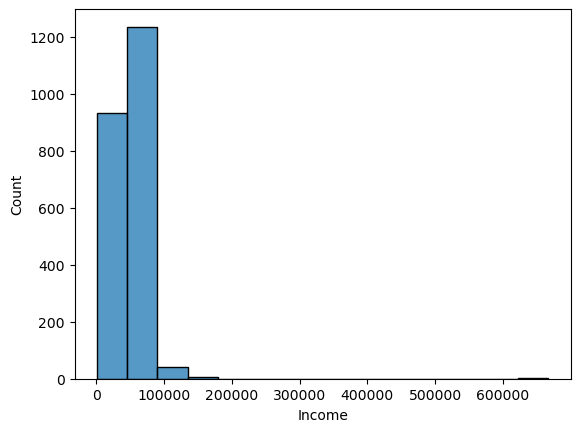

In [91]:
sns.histplot(data["Income"], bins=15)
plt.show()

In [24]:
#data.groupby('Income').size().sort_values(ascending=True)
data.groupby('Income').size().sort_index(ascending=False).head(20)

Income
666666.0    1
162397.0    1
160803.0    1
157733.0    1
157243.0    1
157146.0    1
156924.0    1
153924.0    1
113734.0    1
105471.0    1
102692.0    1
102160.0    1
101970.0    1
98777.0     2
96876.0     1
96843.0     1
96547.0     1
95529.0     1
95169.0     1
94871.0     1
dtype: int64

In [127]:
data.groupby("Age").size().sort_index(ascending=False).head(10)

Age
121     1
115     1
114     1
74      1
73      1
71      6
70      7
69      8
68     16
67     16
dtype: int64

In [133]:
data[data["Age"]> 75]

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education_Category,Marital_Desc,Days_Since_Customer,Total_Spending_Mnt,Family_Size,Age
192,36640.0,99,15,6,8,7,4,25,1,2,1,2,5,1,Basic + 2n Cycle,Single,326,65,1,114
239,60182.0,23,8,0,5,7,0,2,1,1,0,2,4,0,Basic + 2n Cycle,Single,93,22,1,121
339,83532.0,36,755,144,562,104,64,224,1,4,6,4,1,0,PhD + Master,Together,326,1853,0,115


In [135]:
data[data["Income"]>162397]

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education_Category,Marital_Desc,Days_Since_Customer,Total_Spending_Mnt,Family_Size,Age
2233,666666.0,23,9,14,18,8,1,12,4,3,1,3,6,0,Graduation,Together,442,62,1,37


In [25]:
data.shape

(2216, 20)

In [31]:
median_age = data[data['Age'] < 76]["Age"].median()
data['Age'] = data['Age'].apply(lambda x: median_age if x > 75 else x)

median_income= data[data["Income"] < 170000]["Income"].median()
data["Income"] = data["Income"].apply(lambda x: median_income if x > 170000 else x)

In [33]:
median_income= data[data["Income"] < 170000]["Income"].median()
data["Income"] = data["Income"].apply(lambda x: median_income if x > 170000 else x)

In [35]:
#Before Log Transformation take a backup variable and check max, min values of log_cols and na situations
data_backup_log_trans = data.copy()

Because of Zeros in the dataset, adding small constant in a code would be usefull.

**Apply Log Transformation**

In [39]:
log_col= ["Income", "MntWines" , "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "Total_Spending_Mnt"]

In [41]:
data[log_col].describe()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spending_Mnt
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,51969.592058,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,607.075361
std,21521.464067,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,602.900476
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,35303.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,69.000000
50%,51373.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,396.500000
75%,68487.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,1048.000000
max,162397.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,2525.000000


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Add a small constant (1) to avoid issues with zero values, then take log
for col in log_col:
    data[col + '_log'] = np.log1p(data[col])  # log1p(x) = log(x + 1)

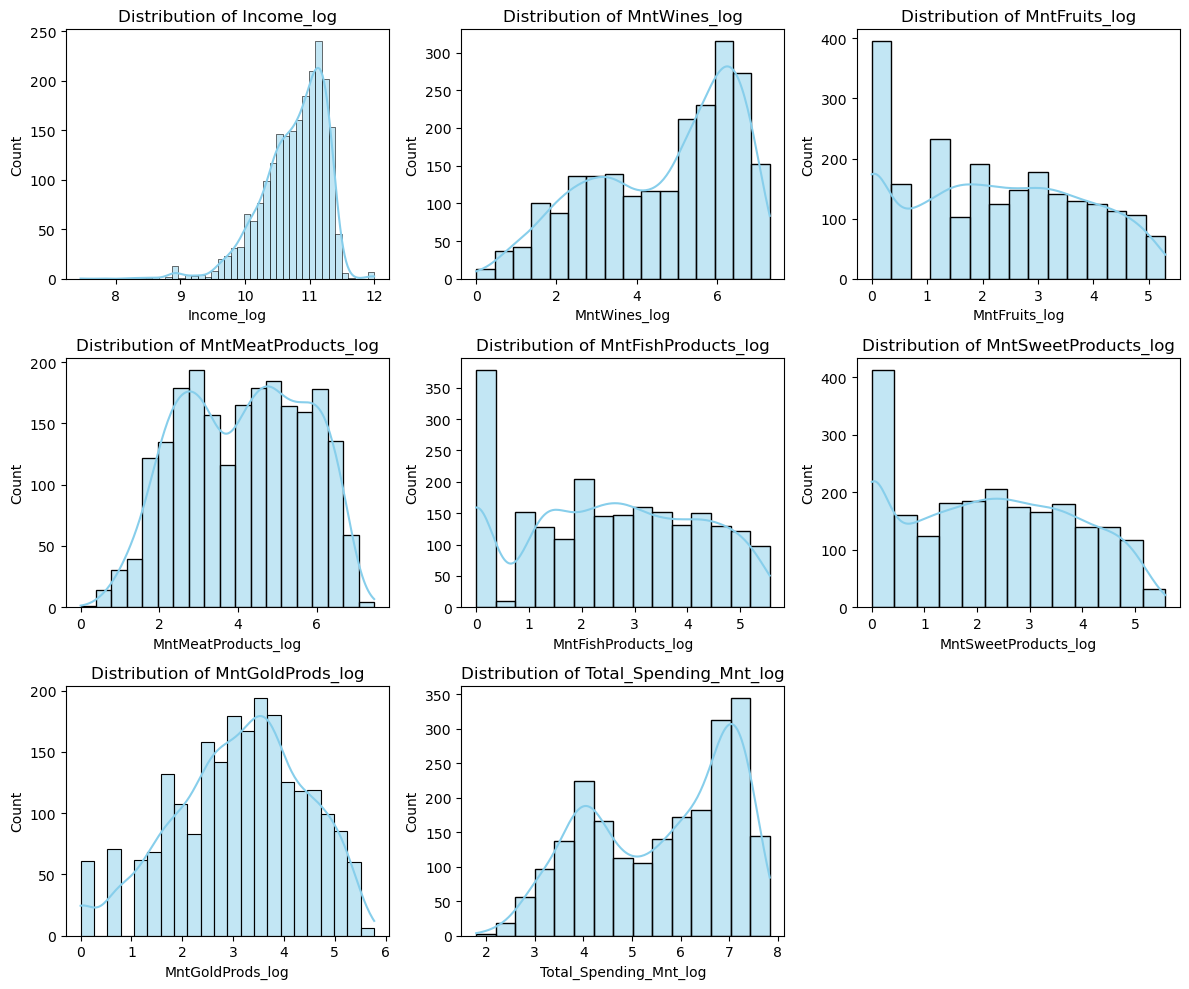

In [239]:
# Visualize the transformed columns
plt.figure(figsize=(12, 10))
for i, col in enumerate(log_col):
    plt.subplot(3, 3, i + 1)  # Adjust the grid size based on the number of columns
    sns.histplot(data[col + '_log'], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}_log")
    plt.xlabel(f"{col}_log")
plt.tight_layout()
plt.show()

In [45]:
data.drop(columns = log_col,inplace=True)

In [47]:
data.head()

,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Education_Category,Marital_Desc,Days_Since_Customer,Family_Size,Age,Income_log,MntWines_log,MntFruits_log,MntMeatProducts_log,MntFishProducts_log,MntSweetProducts_log,MntGoldProds_log,Total_Spending_Mnt_log
0,58,3,8,10,4,7,0,Graduation,Single,713,0,57.0,10.970592,6.455199,4.488636,6.304449,5.153292,4.488636,4.488636,7.388946
1,38,2,1,1,2,5,0,Graduation,Single,163,2,60.0,10.743869,2.484907,0.693147,1.945910,1.098612,0.693147,1.945910,3.332205
2,26,1,8,2,10,4,0,Graduation,Together,362,0,49.0,11.179046,6.056784,3.912023,4.852030,4.718499,3.091042,3.761200,6.655440
3,26,2,2,0,4,6,0,Graduation,Together,189,1,30.0,10.190432,2.484907,1.609438,3.044522,2.397895,1.386294,1.791759,3.988984
4,94,5,5,3,6,5,0,PhD + Master,Together,211,1,33.0,10.973254,5.159055,3.784190,4.779123,3.850148,3.332205,2.772589,6.047372


In [49]:
da_backup_beforebinning= data.copy()

**Apply Binning**

age, day_since_customers and recency

In [51]:
data[["Age", "Days_Since_Customer", "Recency"]].describe().T
#Recency: Number of days since customer last purchase

,count,mean,std,min,25%,50%,75%,max
Age,2216.0,45.081227,11.692358,18.0,37.0,44.0,55.0,74.0
Days_Since_Customer,2216.0,403.521209,202.434667,50.0,230.0,405.5,579.0,749.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.0,99.0


In [53]:
bins_age = [17, 30, 45, 60, 74]  
labels_age = ['Young', 'Middle-aged', 'Mature', 'Senior'] 
data['Age_Binned'] = pd.cut(data['Age'], bins=bins_age, labels=labels_age, right=True)

In [127]:
#data[data["Age_Binned"].isna()== True].head()

In [55]:
bins_days = [49, 230, 405, 579, 749]
labels_days = ['New Customer', 'Relatively New Customer', 'Loyal Customer', 'Long-Term Customer']
data['Days_Since_Customer_Binned'] = pd.cut(data['Days_Since_Customer'], bins=bins_days, labels=labels_days, right=True)

In [57]:
bins_recency = [-1, 24, 49, 74, 99]
labels_recency = ['Very Recent', 'Recent', 'Not Recent', 'Inactive']
data['Recency_Binned'] = pd.cut(data['Recency'], bins=bins_recency, labels=labels_recency, right=True)

In [59]:
data.drop(columns=["Age","Days_Since_Customer","Recency"], inplace=True)

In [61]:
data_backup = data.copy()

In [63]:
data.isna().sum()

NumDealsPurchases             0
NumWebPurchases               0
NumCatalogPurchases           0
NumStorePurchases             0
NumWebVisitsMonth             0
Complain                      0
Education_Category            0
Marital_Desc                  0
Family_Size                   0
Income_log                    0
MntWines_log                  0
MntFruits_log                 0
MntMeatProducts_log           0
MntFishProducts_log           0
MntSweetProducts_log          0
MntGoldProds_log              0
Total_Spending_Mnt_log        0
Age_Binned                    0
Days_Since_Customer_Binned    0
Recency_Binned                0
dtype: int64

**Encode Columns**

Use one-hot encoding for features with fewer unique values (e.g., country, gender).

Use label encoding for features with many unique values (e.g., product IDs).

In [65]:
object_col= data.select_dtypes(include= ["object", "category"]).columns.to_list()

In [67]:
for i in object_col:
    nmbr=data[i].nunique()
    print( f"Number of distinct values for {i} ; {nmbr}")
    

Number of distinct values for Education_Category ; 3
Number of distinct values for Marital_Desc ; 2
Number of distinct values for Age_Binned ; 4
Number of distinct values for Days_Since_Customer_Binned ; 4
Number of distinct values for Recency_Binned ; 4


In [69]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

one_hot_encoder = OneHotEncoder( max_categories=10, sparse_output=False)

encoded_cols = one_hot_encoder.fit_transform(data[object_col])

encoded_df = pd.DataFrame(
    encoded_cols, 
    columns=one_hot_encoder.get_feature_names_out(object_col), 
    index=data.index
)


data=pd.concat([data.drop(columns=object_col), encoded_df], axis=1)

In [71]:
data_backup_encode = data.copy()

**Scale Data**

In [73]:
data.isna().sum()

NumDealsPurchases                                     0
NumWebPurchases                                       0
NumCatalogPurchases                                   0
NumStorePurchases                                     0
NumWebVisitsMonth                                     0
Complain                                              0
Family_Size                                           0
Income_log                                            0
MntWines_log                                          0
MntFruits_log                                         0
MntMeatProducts_log                                   0
MntFishProducts_log                                   0
MntSweetProducts_log                                  0
MntGoldProds_log                                      0
Total_Spending_Mnt_log                                0
Education_Category_Basic + 2n Cycle                   0
Education_Category_Graduation                         0
Education_Category_PhD + Master                 

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [323]:
data = pd.DataFrame(data_scaled, columns=data.columns)
data.head()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Family_Size,Income_log,MntWines_log,MntFruits_log,...,Age_Binned_Senior,Age_Binned_Young,Days_Since_Customer_Binned_Long-Term Customer,Days_Since_Customer_Binned_Loyal Customer,Days_Since_Customer_Binned_New Customer,Days_Since_Customer_Binned_Relatively New Customer,Recency_Binned_Inactive,Recency_Binned_Not Recent,Recency_Binned_Recent,Recency_Binned_Very Recent
0,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.097812,-1.264803,0.433615,0.984704,1.430700,...,-0.367758,-0.362201,1.740428,-0.580129,-0.578740,-0.575961,-0.568318,1.715535,-0.575266,-0.582909
1,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.097812,1.405806,-0.017508,-1.214599,-0.987662,...,-0.367758,-0.362201,-0.574571,-0.580129,1.727892,-0.575961,-0.568318,-0.582909,1.738326,-0.582909
2,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.097812,-1.264803,0.848388,0.764006,1.063301,...,-0.367758,-0.362201,-0.574571,-0.580129,-0.578740,1.736229,-0.568318,-0.582909,1.738326,-0.582909
3,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.097812,0.070501,-1.118712,-1.214599,-0.403832,...,-0.367758,2.760900,-0.574571,-0.580129,1.727892,-0.575961,-0.568318,-0.582909,1.738326,-0.582909
4,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.097812,0.070501,0.438913,0.266718,0.981849,...,-0.367758,-0.362201,-0.574571,-0.580129,1.727892,-0.575961,1.759579,-0.582909,-0.575266,-0.582909


**Feature Importance**

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   NumDealsPurchases                                   2216 non-null   int64  
 1   NumWebPurchases                                     2216 non-null   int64  
 2   NumCatalogPurchases                                 2216 non-null   int64  
 3   NumStorePurchases                                   2216 non-null   int64  
 4   NumWebVisitsMonth                                   2216 non-null   int64  
 5   Complain                                            2216 non-null   int64  
 6   Family_Size                                         2216 non-null   int64  
 7   Income_log                                          2216 non-null   float64
 8   MntWines_log                                        2216 non-null   float64
 9   Mn

Income_log, Total_Spending_Mnt_log, Age, Days_Since_Customer, Recency may be important features for this analysis

!!!!!!!Try out without binning, Age, Recency, Day_Since_Customer and use only total_Spending_mnt

In [92]:
data.shape

(2216, 32)

In [209]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  
reduced_data = pca.fit_transform(data)

In [211]:
pca_df = pd.DataFrame(pca.components_, columns=data.columns)
print("Feature Contributions to PC1:\n", pca_df.iloc[0].sort_values(ascending=False))

Feature Contributions to PC1:
 NumStorePurchases                                     0.507103
NumCatalogPurchases                                   0.429024
NumWebPurchases                                       0.333865
MntWines_log                                          0.284906
MntMeatProducts_log                                   0.261846
Total_Spending_Mnt_log                                0.255327
MntFishProducts_log                                   0.218183
MntSweetProducts_log                                  0.209155
MntFruits_log                                         0.206773
MntGoldProds_log                                      0.152856
Income_log                                            0.069986
NumDealsPurchases                                     0.011157
Age_Binned_Mature                                     0.008077
Days_Since_Customer_Binned_Long-Term Customer         0.006381
Age_Binned_Senior                                     0.006208
Education_Category_Gradu

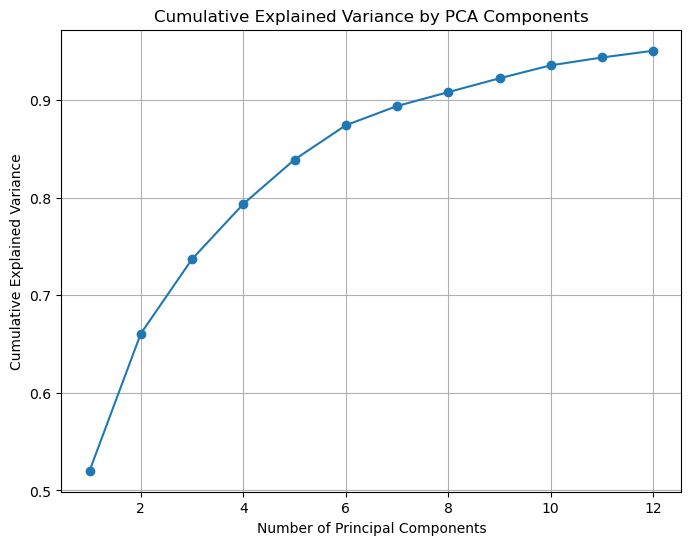

In [215]:

explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


Features with large positive or negative contributions play key roles in defining the primary pattern in the data.

In [100]:
pd.DataFrame(reduced_data)

,0,1,2,3,4,5,6,7,8,9,10,11
0,6.455004,1.260104,-7.562460,-0.940068,1.301522,1.830755,-0.265216,0.329727,0.269309,0.250466,-1.038652,0.621273
1,-6.580577,-2.139773,-0.481384,0.692936,-0.716534,-0.927756,-0.582330,-0.462756,-0.084430,-0.120263,-1.083800,1.194910
2,5.511986,1.302109,2.808646,-2.917429,-0.210477,-0.142227,-0.582140,-0.648516,0.715552,0.387674,0.346084,0.706797
3,-4.854834,-0.856678,1.033210,-0.335317,0.785753,-0.161357,-0.830994,-0.109480,0.656334,0.262089,0.356223,0.455901
4,1.846500,1.180440,-0.749193,0.556621,1.701654,-1.877346,-0.577652,0.841633,0.517079,1.036389,0.529145,-0.718090
...,...,...,...,...,...,...,...,...,...,...,...,...
2211,3.681487,2.284266,-2.778043,-4.346654,0.326712,-1.703042,0.882477,0.347996,-0.915635,-0.942757,0.349644,0.876728
2212,-1.181726,6.325679,-1.267273,2.358146,-3.231842,-2.473843,-0.189044,0.379016,0.157672,0.222985,0.337096,-0.006985
2213,4.918529,-0.728498,5.081857,1.798575,1.567012,3.305215,1.507874,0.119901,0.205401,0.946410,-0.634054,0.335220
2214,6.438698,-0.563921,1.222665,0.041756,-0.237676,-0.205153,-0.570071,-0.417613,0.379466,-0.051593,0.315520,-0.144162


In [114]:
import numpy as np
from sklearn.cluster import KMeans

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

# Get centroids
centroids = kmeans.cluster_centers_

# Calculate centroid spread for each feature
centroid_spread = np.var(centroids, axis=0)
feature_importance = pd.Series(centroid_spread, index=data.columns)

# Sort by importance
sorted_importance = feature_importance.sort_values(ascending=False)
print("Feature Importance Based on Centroid Spread:\n", sorted_importance)

Feature Importance Based on Centroid Spread:
 NumStorePurchases                                     5.405937
NumCatalogPurchases                                   4.641415
NumWebPurchases                                       3.867940
NumWebVisitsMonth                                     2.763919
MntWines_log                                          2.131382
MntMeatProducts_log                                   1.649066
Total_Spending_Mnt_log                                1.590004
NumDealsPurchases                                     1.212137
MntFishProducts_log                                   1.196931
MntFruits_log                                         1.075826
MntSweetProducts_log                                  1.066063
Cluster                                               0.666667
MntGoldProds_log                                      0.552143
Family_Size                                           0.162763
Income_log                                            0.118891
Days_Sinc

**Feature Importance based on Centroid Spread**; How much each feature contributes to the seperation of centroids in K-Means? Higher values indicate that the feature helps distinguish clusters more effectively.

Features that i selected based on PCA and Centroid Spread results;

NumStorePurchases
NumCatalogPurchases
NumWebPurchases
NumWebVisitsMonth
MntWines_log
MntMeatProducts_log
MntFishProducts_log
MntSweetProducts_log
NumDealsPurchases


Spending behaviors (e.g., MntWines_log, Total_Spending_Mnt_log).
Shopping patterns (e.g., NumWebPurchases, NumStorePurchases, NumDealsPurchases).
Customer engagement (e.g., NumWebVisitsMonth, NumCatalogPurchases).



Features to drop;
Complain
Age_Binned_Young
Recency_Binned_Very Recent
Recency_Binned_Not Recent
Days_Since_Customer_Binned_Loyal Customer
Marital_Desc_Together
Marital_Desc_Single
Education_Category_Basic + 2n Cycle
Age_Binned_Senior
Days_Since_Customer_Binned_New Customer


Remainings;
Family_Size
Income_log
MntGoldProds_log
MntFruits_log
Education_Category_PhD + Master
Education_Category_Graduation
Age_Binned_Mature
Age_Binned_Middle-aged
Recency_Binned_Inactive
Recency_Binned_Recent
Days_Since_Customer_Binned_Relatively New Customer
Days_Since_Customer_Binned_Long-Term Customer

In [ ]:
del_col = ["Complain","Age_Binned_Young","Recency_Binned_Very Recent","Recency_Binned_Not Recent","Days_Since_Customer_Binned_Loyal Customer"
           ,"Marital_Desc_Together","Marital_Desc_Single","Education_Category_Basic + 2n Cycle","Age_Binned_Senior"
           , "Days_Since_Customer_Binned_New Customer", "MntGoldProds_log", "MntFruits_log", "Cluster", "Total_Spending_Mnt_log"]

In [132]:
data_k = data.drop(columns=del_col)

In [142]:
data_k.shape

(2216, 19)

**new one**

In [217]:
col_ = ['NumStorePurchases',                                    
'NumCatalogPurchases' ,                                 
'NumWebPurchases',                                      
'MntWines_log'    ,                                     
'MntMeatProducts_log'  ,                                
'Total_Spending_Mnt_log'   ,                             
'MntFishProducts_log'   ,                               
'MntSweetProducts_log']                                  

In [239]:
data_new= data[col_].copy() 

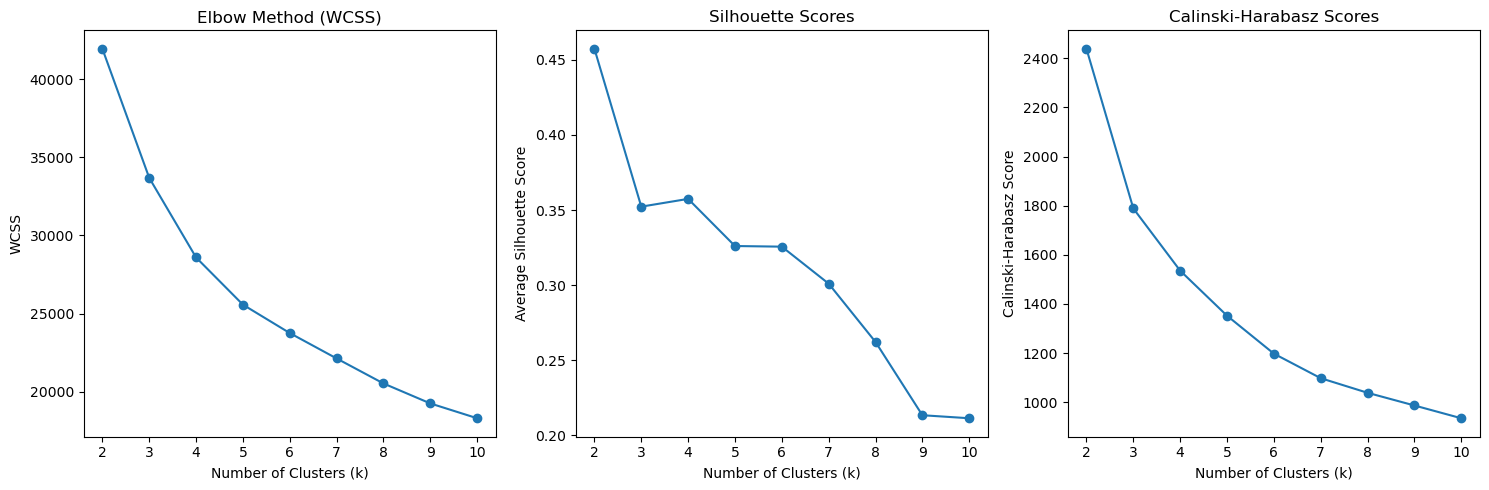

In [241]:
k_values = range(2, 11)


wcss = []
silhouette_scores = []
calinski_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_new)
    labels = kmeans.labels_
    
    # WCSS (Inertia)
    wcss.append(kmeans.inertia_)
    
    # Silhouette Score
    silhouette_scores.append(silhouette_score(data_new, labels))
    
    # Calinski-Harabasz Score
    calinski_scores.append(calinski_harabasz_score(data_new, labels))


plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.plot(k_values, wcss, marker='o')
plt.title("Elbow Method (WCSS)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")


plt.subplot(1, 3, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Score")

plt.subplot(1, 3, 3)
plt.plot(k_values, calinski_scores, marker='o')
plt.title("Calinski-Harabasz Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Calinski-Harabasz Score")

plt.tight_layout()
plt.show()

In [243]:
kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-4,
    random_state=42
)

kmeans.fit(data_new)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [245]:
data_new['Cluster'] = kmeans.labels_

         NumStorePurchases  NumCatalogPurchases  NumWebPurchases  \
Cluster                                                            
0                 5.982512             2.370429         5.720191   
1                 9.346434             5.902475         5.586608   
2                 2.967778             0.414444         1.796667   

         MntWines_log  MntMeatProducts_log  Total_Spending_Mnt_log  \
Cluster                                                              
0            5.605265             4.577870                6.273723   
1            6.270537             5.763481                7.107828   
2            2.813230             2.569482                4.035110   

         MntFishProducts_log  MntSweetProducts_log  
Cluster                                             
0                   2.605461              2.240858  
1                   4.007197              3.674843  
2                   1.370533              1.148125  


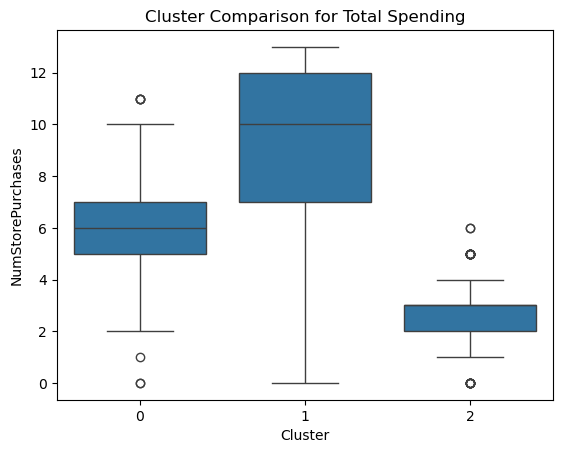

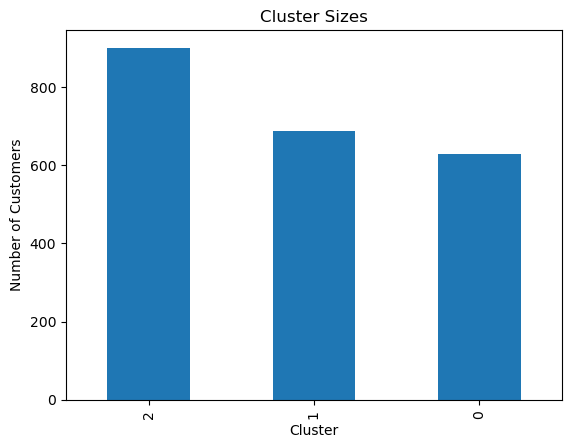

In [247]:
cluster_summary = data_new.groupby('Cluster').mean()
print(cluster_summary)


import seaborn as sns
sns.boxplot(x='Cluster', y='NumStorePurchases', data=data_new)
plt.title("Cluster Comparison for Total Spending")
plt.show()


cluster_counts = data_new['Cluster'].value_counts()
cluster_counts.plot(kind='bar', title='Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

In [252]:
from sklearn.metrics import silhouette_score

# Silhouette Score
sil_score = silhouette_score(data_new, kmeans.labels_)
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.36801858820010974


In [258]:
kmeans.inertia_

33681.90725416607

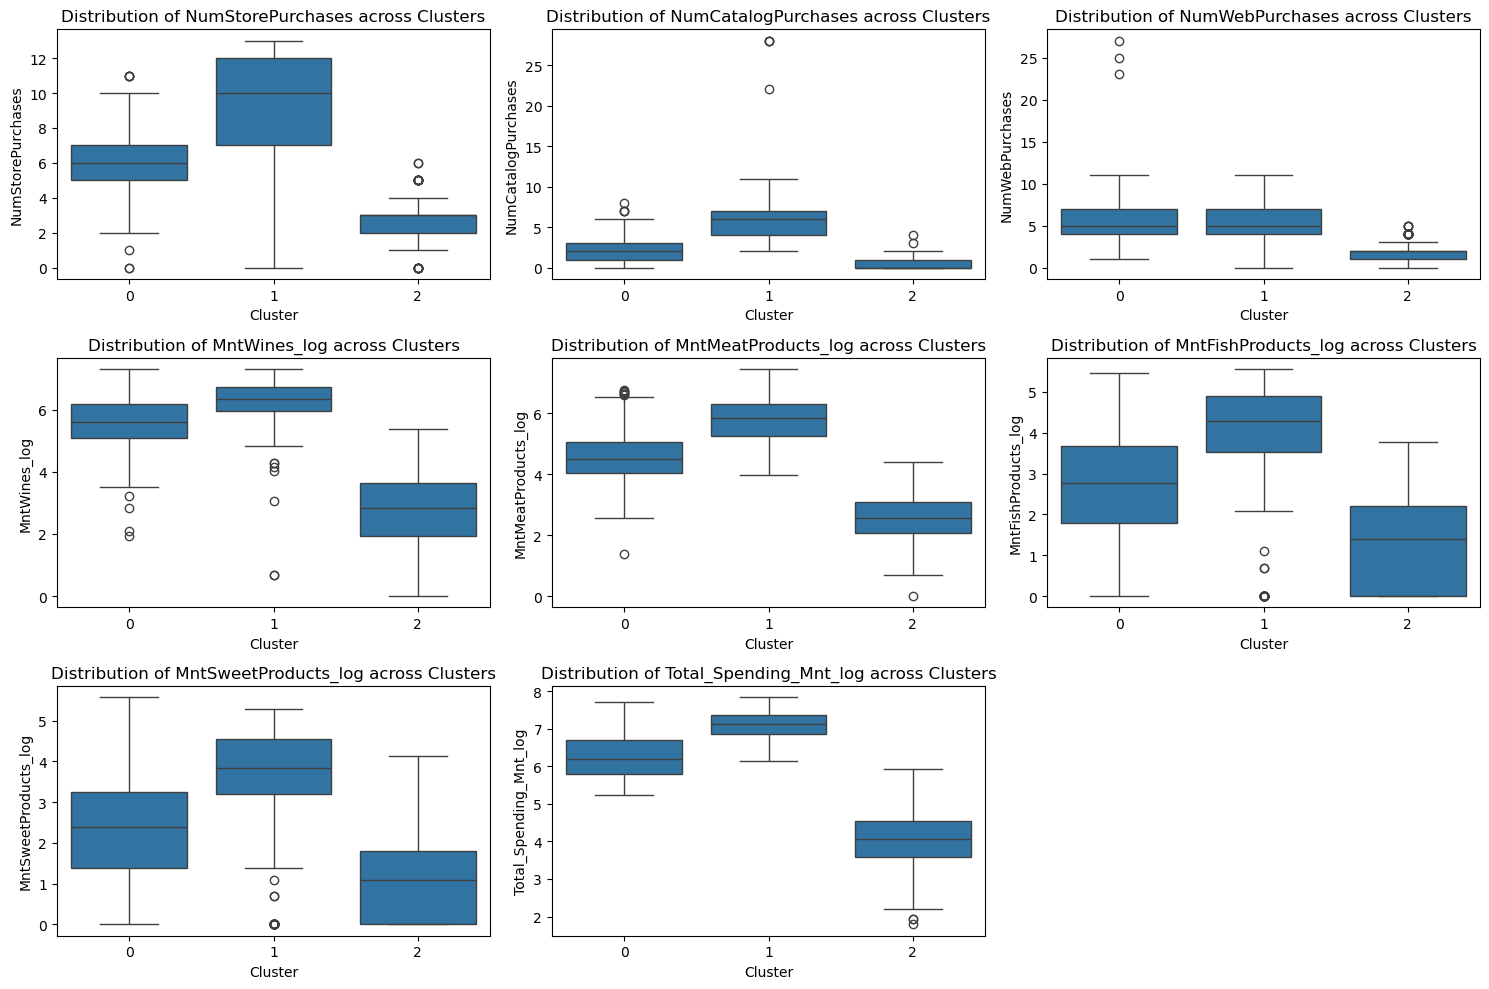

In [260]:
import seaborn as sns

# Create a new DataFrame that includes cluster labels
data_new['Cluster'] = kmeans.labels_

# List of features you want to visualize
features = ['NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'MntWines_log', 'MntMeatProducts_log', 
            'MntFishProducts_log', 'MntSweetProducts_log', 'Total_Spending_Mnt_log']

# Create a boxplot for each feature across the clusters
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Cluster', y=feature, data=data_new)
    plt.title(f'Distribution of {feature} across Clusters')

plt.tight_layout()
plt.show()


**Choosing K value by using Elbow**

**Inertia (Within-Cluster Sum of Squares, WCSS):** The sum of squared distances between each data point and its cluster's centroid.

**The Average Silhouette Score**: Measures how similar each point is to its own cluster compared to others.

Measures how similar each point is to its own cluster compared to others.

**The Calinski-Harabasz Score** :  The ratio of the variance between clusters to the variance within clusters. A higher score means better-defined clusters.

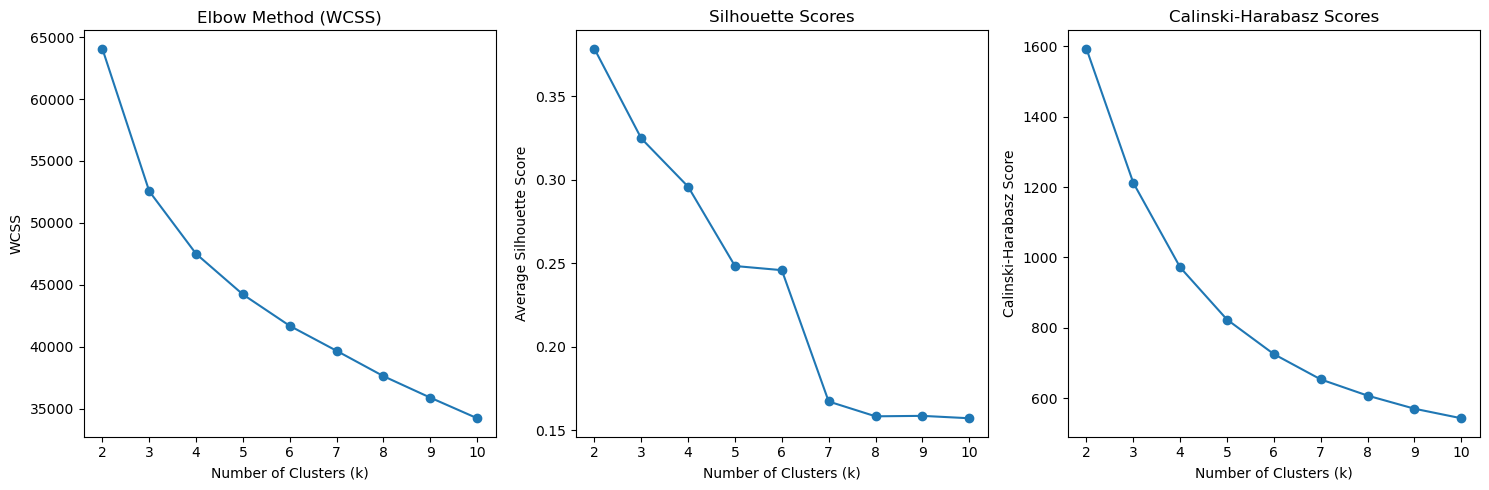

In [153]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt

k_values = range(2, 11)


wcss = []
silhouette_scores = []
calinski_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_k)
    labels = kmeans.labels_
    
    # WCSS (Inertia)
    wcss.append(kmeans.inertia_)
    
    # Silhouette Score
    silhouette_scores.append(silhouette_score(data_k, labels))
    
    # Calinski-Harabasz Score
    calinski_scores.append(calinski_harabasz_score(data_k, labels))


plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.plot(k_values, wcss, marker='o')
plt.title("Elbow Method (WCSS)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")


plt.subplot(1, 3, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Score")

plt.subplot(1, 3, 3)
plt.plot(k_values, calinski_scores, marker='o')
plt.title("Calinski-Harabasz Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Calinski-Harabasz Score")

plt.tight_layout()
plt.show()


**Interpreting K-Means Results for k=4**

In [158]:
kmeans = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=1e-4,
    random_state=42
)


kmeans.fit(data_k)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [160]:
data_k['Cluster'] = kmeans.labels_

print("Centroids:", kmeans.cluster_centers_)
print("Inertia:", kmeans.inertia_)
print("Iterations:", kmeans.n_iter_)

##data_k.to_csv("clustered_data.csv", index=False)

Centroids: [[ 1.9354067   5.81818182  5.06698565 11.05502392  3.72009569  0.55263158
  11.1606875   6.27732967  5.5976398   3.88665007  3.61729903  0.51196172
   0.39712919  0.33971292  0.37799043  0.28229665  0.25837321  0.23923445
   0.23684211]
 [ 1.40779221  4.53246753  5.93246753  6.18181818  2.62597403  0.2961039
  11.17403764  6.03752855  5.75541785  4.03025186  3.59587387  0.55844156
   0.37142857  0.36883117  0.37142857  0.20779221  0.24935065  0.22597403
   0.22337662]
 [ 1.9         1.87659574  0.45212766  3.04255319  6.45319149  1.23617021
  10.34588302  2.88834399  2.63163344  1.41389053  1.18791067  0.47978723
   0.35425532  0.26702128  0.49787234  0.18617021  0.26595745  0.26489362
   0.25744681]
 [ 4.25369979  6.57928118  2.30866808  6.32980973  6.67019027  1.25158562
  10.85752656  5.71260505  4.48655599  2.36772768  2.01765411  0.49894292
   0.43128964  0.40591966  0.42071882  0.37420719  0.20718816  0.22198732
   0.26215645]]
Inertia: 47509.68983998873
Iterations: 54

In [164]:
cluster_summary = data_k.groupby('Cluster').describe()
print(cluster_summary)

         NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
Cluster                                                            
0                 1.935407         5.818182             5.066986   
1                 1.407792         4.532468             5.932468   
2                 1.900000         1.876596             0.452128   
3                 4.253700         6.579281             2.308668   

         NumStorePurchases  NumWebVisitsMonth  Family_Size  Income_log  \
Cluster                                                                  
0                11.055024           3.720096     0.552632   11.160687   
1                 6.181818           2.625974     0.296104   11.174038   
2                 3.042553           6.453191     1.236170   10.345883   
3                 6.329810           6.670190     1.251586   10.857527   

         MntWines_log  MntMeatProducts_log  MntFishProducts_log  \
Cluster                                                           
0           

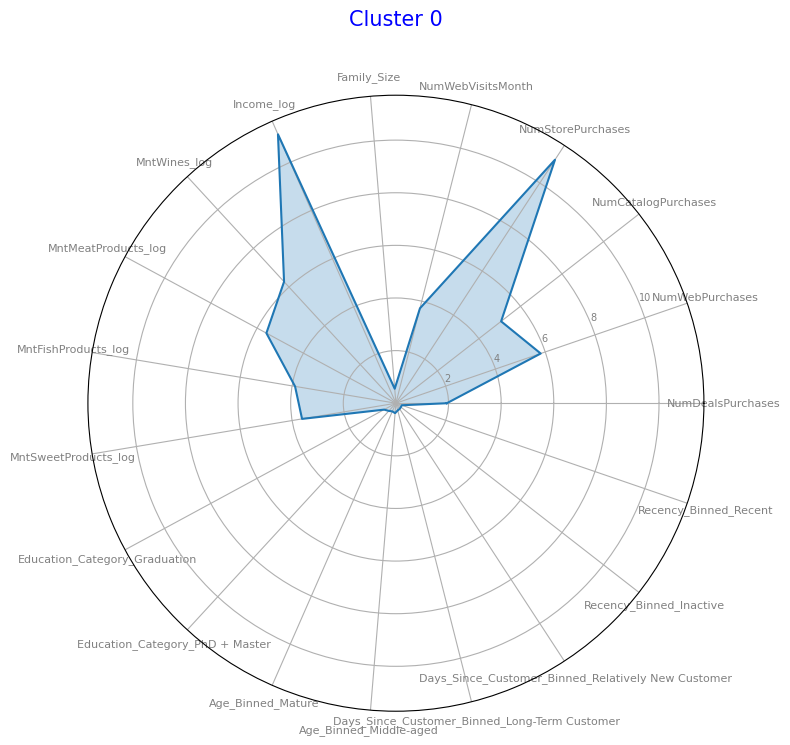

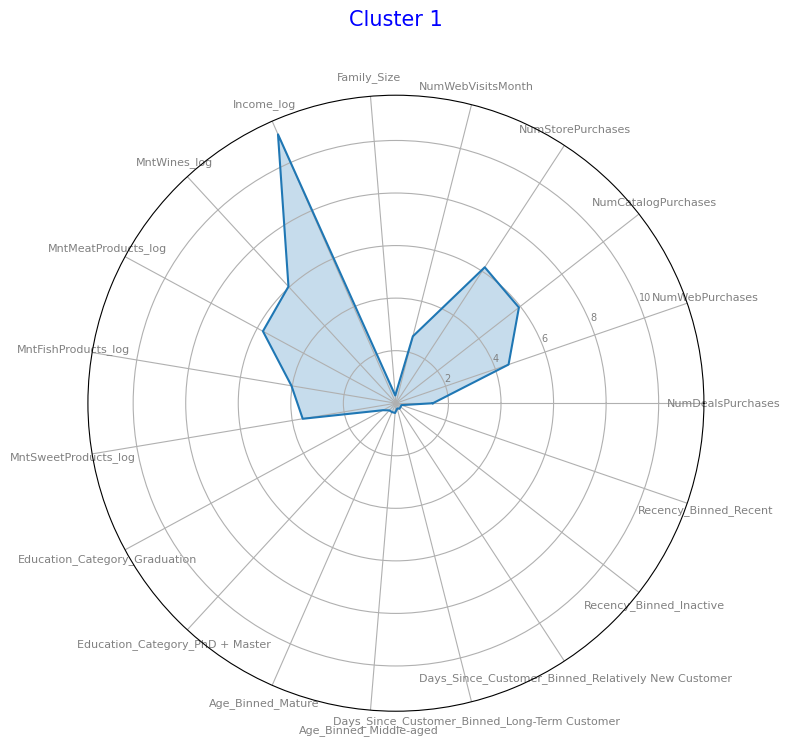

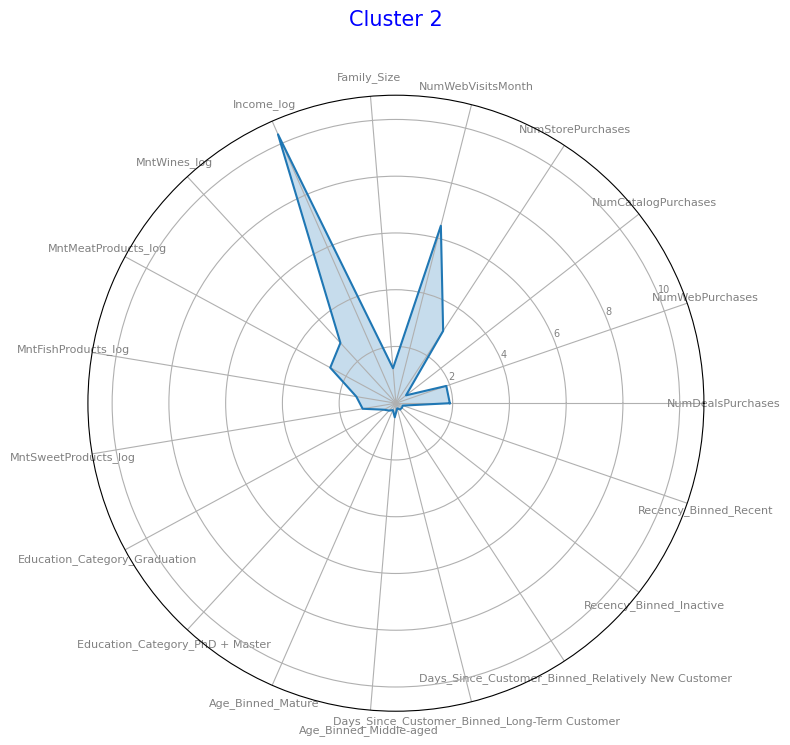

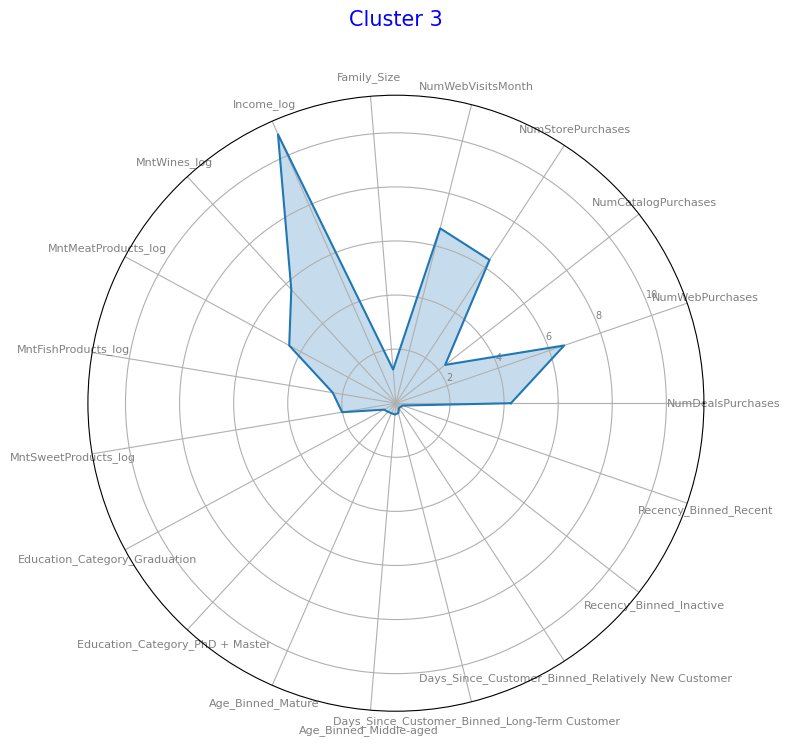

In [170]:
from math import pi


categories = data_k.columns[:-1] 
num_clusters = cluster_summary.shape[0]

for i in range(num_clusters):
    values = cluster_summary.iloc[i].values.flatten().tolist()
    values += values[:1]  # Loop back to the start
    
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 1, 1, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    plt.yticks(color="grey", size=7)
    plt.fill(angles, values, alpha=0.25)
    plt.plot(angles, values)
    plt.title(f"Cluster {i}", size=15, color="blue", y=1.1)
    plt.show()


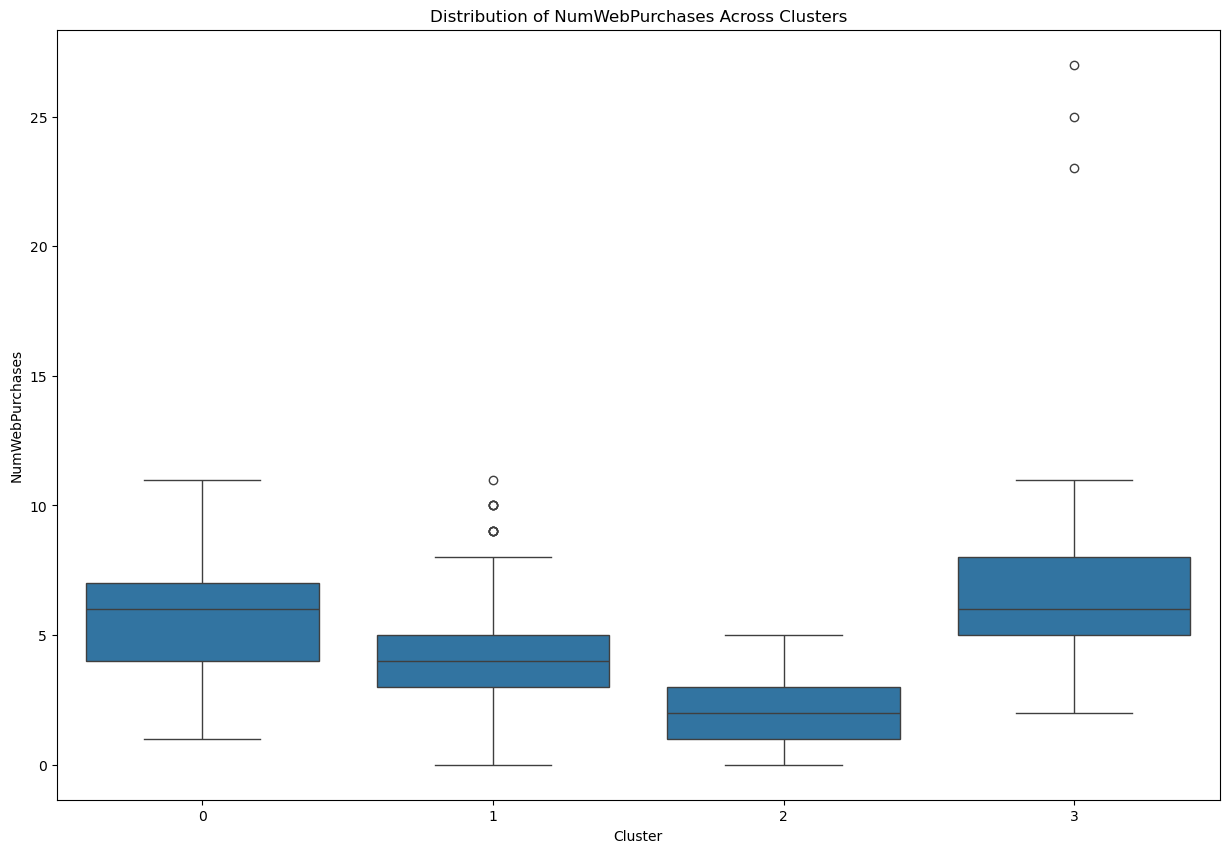

In [172]:
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.boxplot(x='Cluster', y='NumWebPurchases', data=data_k)
plt.title("Distribution of NumWebPurchases Across Clusters")
plt.show()


         NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
Cluster                                                            
0                 1.935407         5.818182             5.066986   
1                 1.407792         4.532468             5.932468   
2                 1.900000         1.876596             0.452128   
3                 4.253700         6.579281             2.308668   

         NumStorePurchases  NumWebVisitsMonth  Family_Size  Income_log  \
Cluster                                                                  
0                11.055024           3.720096     0.552632   11.160687   
1                 6.181818           2.625974     0.296104   11.174038   
2                 3.042553           6.453191     1.236170   10.345883   
3                 6.329810           6.670190     1.251586   10.857527   

         MntWines_log  MntMeatProducts_log  MntFishProducts_log  \
Cluster                                                           
0           

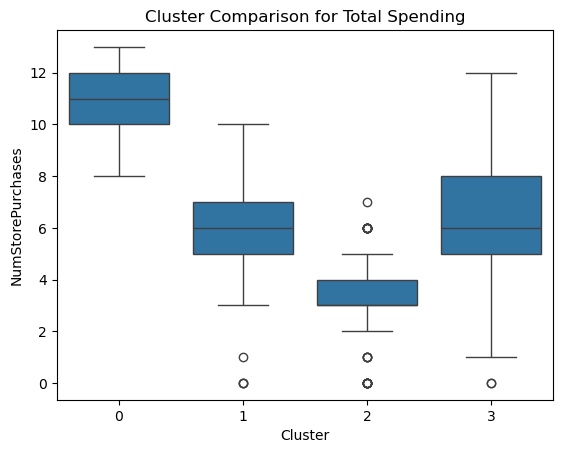

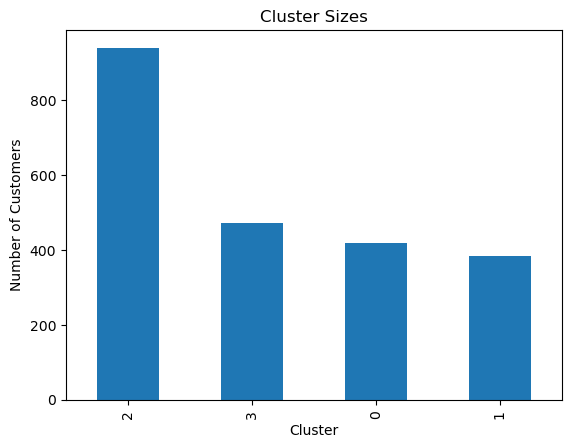

In [178]:
cluster_summary = data_k.groupby('Cluster').mean()
print(cluster_summary)


import seaborn as sns
sns.boxplot(x='Cluster', y='NumStorePurchases', data=data_k)
plt.title("Cluster Comparison for Total Spending")
plt.show()


cluster_counts = data_k['Cluster'].value_counts()
cluster_counts.plot(kind='bar', title='Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


In [168]:
data_k.groupby('Cluster').describe().T

Cluster                               0           1           2           3
NumDealsPurchases     count  418.000000  385.000000  940.000000  473.000000
                      mean     1.935407    1.407792    1.900000    4.253700
                      std      1.324240    1.485149    1.264153    2.436288
                      min      0.000000    0.000000    0.000000    0.000000
                      25%      1.000000    1.000000    1.000000    2.000000
...                                 ...         ...         ...         ...
Recency_Binned_Recent min      0.000000    0.000000    0.000000    0.000000
                      25%      0.000000    0.000000    0.000000    0.000000
                      50%      0.000000    0.000000    0.000000    0.000000
                      75%      0.000000    0.000000    1.000000    1.000000
                      max      1.000000    1.000000    1.000000    1.000000

[152 rows x 4 columns]

**Different Approach** Apply K-Means alongwith PCA variables.

In [185]:
X_scaled = data.copy()

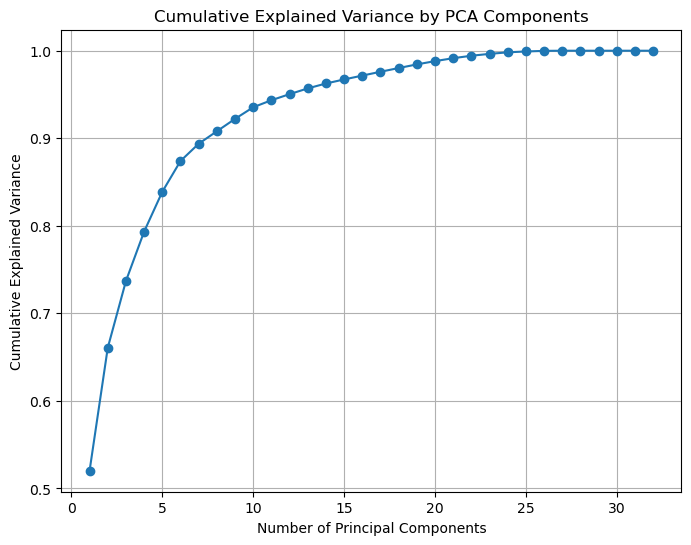

In [199]:

from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 2: Explained variance plot
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [201]:

# Step 3: Decide how many components to keep based on the cumulative variance
# You might choose the number of components that explain, for example, 90% of the variance
n_components = np.argmax(np.cumsum(explained_variance) >= 0.90) + 1  # For 90% explained variance

print(f"Number of PCA components explaining 90% variance: {n_components}")

Number of PCA components explaining 90% variance: 8


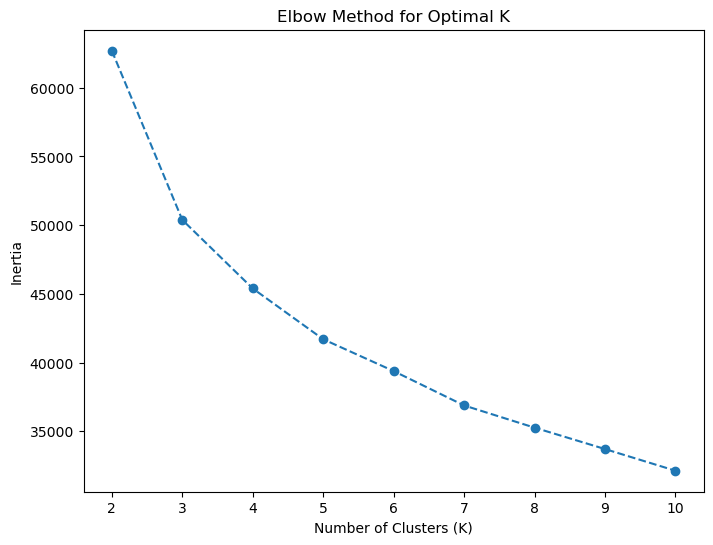

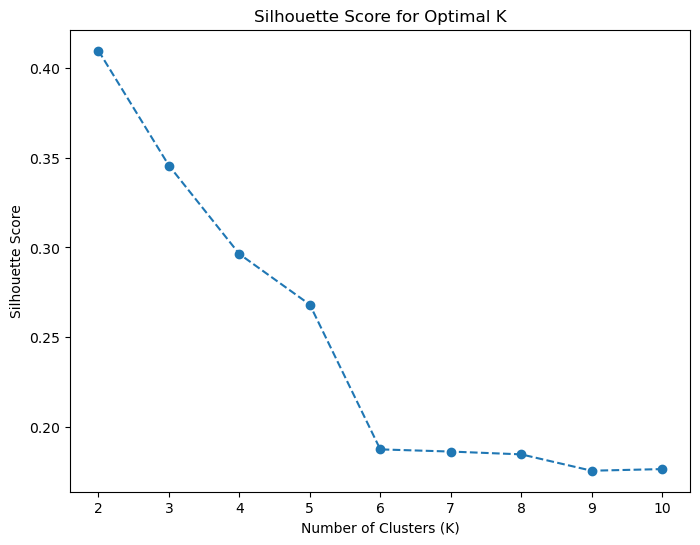

In [203]:
X_pca_reduced = X_pca[:, :n_components]

# Now, use K-Means on the reduced PCA data
inertias = []
silhouette_scores = []

k_range = range(2, 11)  # Try clustering with k=2 to k=10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca_reduced)
    inertias.append(kmeans.inertia_)
    cluster_labels = kmeans.predict(X_pca_reduced)
    silhouette_scores.append(silhouette_score(X_pca_reduced, cluster_labels))

# Plot the Elbow Method (Inertia)
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertias, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Plot the Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the optimal k based on these plots

In [205]:
from sklearn.cluster import KMeans

# Step 1: Fit K-Means with 3 clusters using the first 8 PCA components
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca_reduced)  # Using the first 8 PCA components for clustering

# Step 2: Cluster centers (centroids) - these represent the average feature values for each cluster
cluster_centroids = kmeans.cluster_centers_

# Step 3: Assign cluster labels to the data
cluster_labels = kmeans.labels_

# Step 4: Print the centroids for each cluster
print("Cluster Centroids (in the PCA space):")
print(cluster_centroids)

# Step 5: Optionally, print the first few labels assigned to the samples
print("\nFirst 10 sample cluster labels:")
print(cluster_labels[:10])

# Step 6: Interpret results
# You can also analyze how each feature is distributed across the clusters.
# For example, you can look at the distribution of the original features for each cluster.

# Add the cluster labels back to the original dataset for easier interpretation
data_with_labels = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(8)])
data_with_labels['Cluster'] = cluster_labels

# View summary statistics per cluster
cluster_summary = data_with_labels.groupby('Cluster').mean()
print("\nCluster Summary (Average of Features per Cluster):")
print(cluster_summary)


Cluster Centroids (in the PCA space):
[[ 1.51411252  3.3454169  -0.13890075  0.09814578 -0.23133092 -0.43230457
   0.28491924 -0.04293051]
 [ 5.97310386 -1.66965268 -0.01967248 -0.04282356  0.10616887  0.15202092
  -0.01061477  0.06187948]
 [-5.57484255 -0.64643634  0.09670408 -0.02380027  0.05198937  0.13356925
  -0.1583525  -0.02346154]]

First 10 sample cluster labels:
[1 2 1 2 0 0 0 2 2 2]

Cluster Summary (Average of Features per Cluster):
              PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
Cluster                                                                         
0        1.519186  3.351928 -0.145516  0.094704 -0.225789 -0.432504  0.284044   
1        5.973104 -1.669653 -0.019672 -0.042824  0.106169  0.152021 -0.010615   
2       -5.570229 -0.645970  0.100311 -0.021662  0.048454  0.133081 -0.157369   

              PC8  
Cluster            
0       -0.042459  
1        0.061879  
2       -0.023758  
